
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


Timestamp_f1      MM_Timestamp_f1  THEORETICAL_TONNAGE_f3  \
0       2021-08-01 01:23:00  2021-08-01 00:00:00                    6006   
1       2021-08-01 01:23:00  2021-08-01 00:01:00                    6006   
2       2021-08-01 01:23:00  2021-08-01 00:02:00                    6006   
3       2021-08-01 01:23:00  2021-08-01 00:03:00                    6006   
4       2021-08-01 01:23:00  2021-08-01 00:04:00                    6006   
...                     ...                  ...                     ...   
266211  2022-01-31 22:16:00  2022-01-31 22:12:00                    6322   
266212  2022-01-31 22:16:00  2022-01-31 22:13:00                    6322   
266213  2022-01-31 22:16:00  2022-01-31 22:14:00                    6322   
266214  2022-01-31 22:16:00  2022-01-31 22:15:00                    6322   
266215  2022-01-31 22:16:00  2022-01-31 22:16:00                    6322   

        Coke_Rate_f3  HOT_BLAST_TMP_NS_f3  WINDRATE_f3  \
0                992          1999.604384   179.749638   
1                992          2000.288837   179.765945   
2                992          1999.242862   179.782251   
3                992          1999.884442   179.798490   
4                992          1999.849729   179.784430   
...              ...                  ...          ...   
266211           924          2167.603916   189.029098   
266212           924          2167.404841   188.892415   
266213           924          2167.205766   188.689857   
266214           924          2167.006691   188.610793   
266215           924          2166.807617   188.621779   

        SNORT_VALVE_POSITION_f3  COLD_BLAST_MOISTURE_f3  \
0                     98.334297                4.997585   
1                     98.334297                5.000531   
2                     98.334297                5.003476   
3                     98.334297                5.006422   
4                     98.334297                5.009368   
...                         ...                     ...   
266211                98.334297                1.151288   
266212                98.334297                1.151910   
266213                98.334297                1.152533   
266214                98.334297                1.153156   
266215                98.334297                1.153779   

        HOST_BLAST_MOISTURE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
0                     8.084517               2.510680           0.0   
1                     8.079545               2.489381           0.0   
2                     8.074573               2.489037           0.0   
3                     8.069602               2.496867           0.0   
4                     8.064630               2.501961           0.0   
...                        ...                    ...           ...   
266211                5.105940               0.000000           0.0   
266212                5.110442               0.000000           0.0   
266213                5.114944               0.000000           0.0   
266214                5.119446               0.000000           0.0   
266215                5.123948               0.000000           0.0   

        NAT_GAS _INJECTION_f3  HOT_BLAST_PRESSURE_f3  TOP_PRESS_f3  \
0                 4034.234339              34.357590     17.398326   
1                 4024.947376              34.328821     17.483486   
2                 4011.601682              34.300052     17.260358   
3                 4012.024633              34.271282     17.212606   
4                 4000.467204              34.242513     17.405035   
...                       ...                    ...           ...   
266211           10497.271240              35.644868     18.695292   
266212           10524.821170              35.648894     17.985995   
266213           10520.260680              35.635697     18.707857   
266214           10518.901880              35.621174     18.198216   
266215           10612.610090              35.602023     18.338861   

  


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


SI_f1  HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  \
1     0.719500                4.242439          2161.425209   
2     0.710486                4.174343          2168.238915   
3     0.666106                4.126144          2167.779119   
4     0.675145                4.120736          2166.974740   
5     0.776831                4.120331          2166.384674   
...        ...                     ...                  ...   
1390  0.762500                4.204430          2169.361647   
1391  0.646000                4.208539          2169.079601   
1392  0.654667                4.212648          2168.797556   
1393  0.591667                4.217784          2168.444999   
1394  0.724667                4.223948          2167.967389   

      NAT_GAS _INJECTION_f3  WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  \
1               9306.840913   184.818611                    0.0           0.0   
2               9336.364456   185.993447                    0.0           0.0   
3               9419.200115   185.828474                    0.0           0.0   
4               9564.165802   185.924481                    0.0           0.0   
5               9648.247637   185.942943                    0.0           0.0   
...                     ...          ...                    ...           ...   
1390            9297.484543   185.046491                    0.0           0.0   
1391            9312.779010   185.053796                    0.0           0.0   
1392            9303.753420   185.007919                    0.0           0.0   
1393            9333.448101   184.942435                    0.0           0.0   
1394            9321.819731   184.863855                    0.0           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2  date_f1    CNUM     LNUM_f1  \
1              0.354        0.16  44562.0     2.0  168.666667   
2              0.313        0.83  44562.0     6.0  137.450000   
3              0.360        0.10  44562.0     7.0  156.684211   
4              0.319        0.34  44562.0     8.0  150.869919   
5              0.335        0.28  44562.0     9.0  160.218182   
...              ...         ...      ...     ...         ...   
1390           0.343        0.30  44561.0  4344.0  147.500000   
1391           0.324        0.30  44561.0  4345.0  147.500000   
1392           0.325        0.16  44561.0  4346.0  174.000000   
1393           0.335        0.26  44561.0  4347.0  160.000000   
1394           0.328        1.08  44561.0  4348.0  149.333333   

      Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  \
1               21.080431             18.313322             4.131228   
2               20.996415             18.311768             4.133911   
3               20.749627             18.341701             4.137632   
4               20.609259             18.644476             4.142824   
5               20.617383             18.845791             4.220690   
...                   ...                   ...                  ...   
1390            21.039583             18.308225             4.129485   
1391            21.043999             18.308776             4.129674   
1392            21.048415             18.309327             4.129862   
1393            21.053935             18.310016             4.130097   
1394            21.060559             18.310842             4.130380   

      Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  NW_Uptake_f3  \
1               54.940123    171.769513    182.533770    148.126483   
2               55.072779    170.595469    183.725050    148.161842   
3               55.375043    167.017421    195.812061    147.562523   
4               55.341884    154.214917    188.028883    147.807509   
5               55.284451    156.234542    200.141261    149.014319   
...                   ...           ...           ...           ...   
1390            55.162782    167.619915    185.900341    148.103530   
1391            55.162767    164.706552    182.408576    148.1060

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

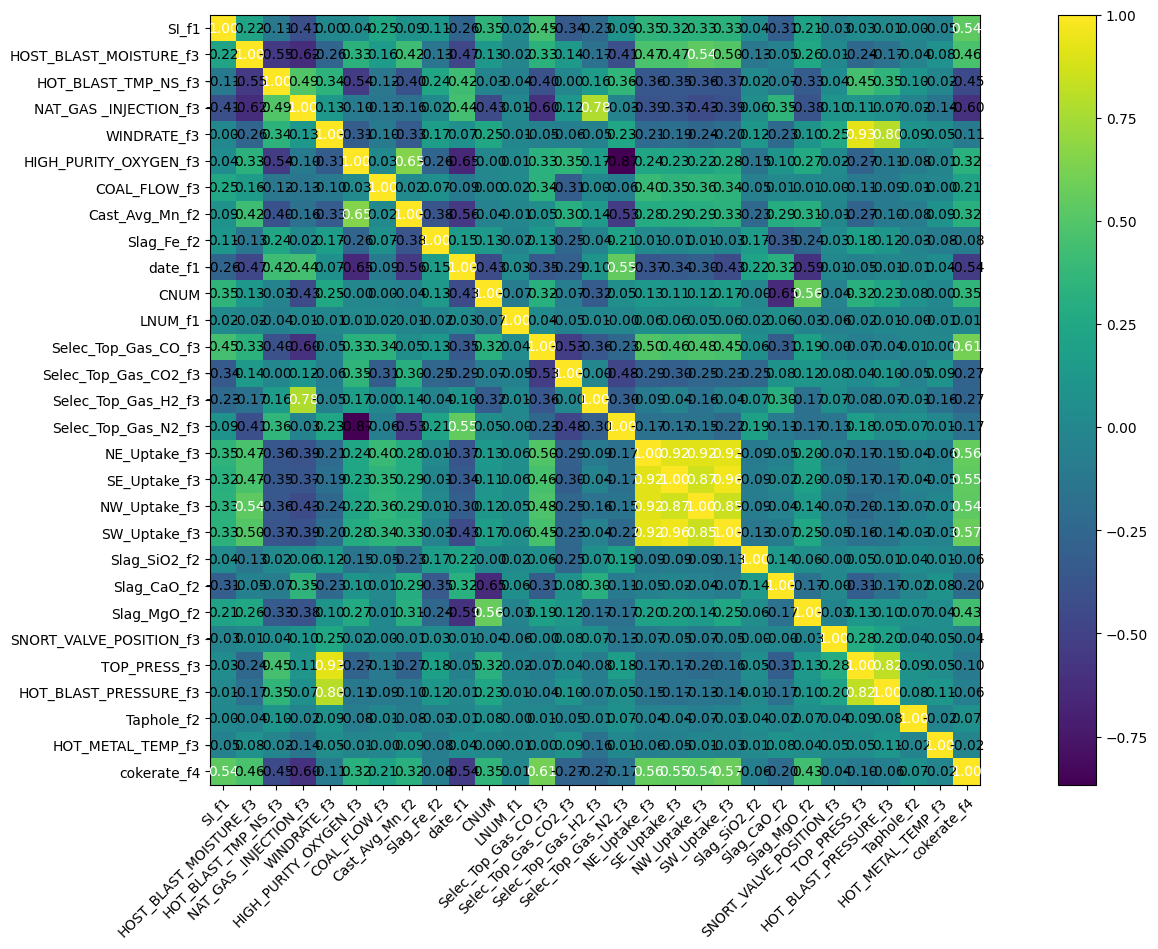

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


SI_f1             Date_Map  HOST_BLAST_MOISTURE_f3  \
1     0.719500  2022-01-01 00:45:00                4.242439   
2     0.710486  2022-01-01 08:43:00                4.174343   
3     0.666106  2022-01-01 10:17:00                4.126144   
4     0.675145  2022-01-01 12:40:00                4.120736   
5     0.776831  2022-01-01 15:06:00                4.120331   
...        ...                  ...                     ...   
1390  0.762500  2021-12-31 13:10:00                4.204430   
1391  0.646000  2021-12-31 14:41:00                4.208539   
1392  0.654667  2021-12-31 16:15:00                4.212648   
1393  0.591667  2021-12-31 17:40:00                4.217784   
1394  0.724667  2021-12-31 19:31:00                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
1             2161.425209            9306.840913   184.818611   
2             2168.238915            9336.364456   185.993447   
3             2167.779119            9419.200115   185.828474   
4             2166.974740            9564.165802   185.924481   
5             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1390          2169.361647            9297.484543   185.046491   
1391          2169.079601            9312.779010   185.053796   
1392          2168.797556            9303.753420   185.007919   
1393          2168.444999            9333.448101   184.942435   
1394          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2  \
1                       0.0           0.0           0.354        0.16   
2                       0.0           0.0           0.313        0.83   
3                       0.0           0.0           0.360        0.10   
4                       0.0           0.0           0.319        0.34   
5                       0.0           0.0           0.335        0.28   
...                     ...           ...             ...         ...   
1390                    0.0           0.0           0.343        0.30   
1391                    0.0           0.0           0.324        0.30   
1392                    0.0           0.0           0.325        0.16   
1393                    0.0           0.0           0.335        0.26   
1394                    0.0           0.0           0.328        1.08   

      date_f1    CNUM     LNUM_f1  Selec_Top_Gas_CO_f3  Selec_Top_Gas_CO2_f3  \
1     44562.0     2.0  168.666667            21.080431             18.313322   
2     44562.0     6.0  137.450000            20.996415             18.311768   
3     44562.0     7.0  156.684211            20.749627             18.341701   
4     44562.0     8.0  150.869919            20.609259             18.644476   
5     44562.0     9.0  160.218182            20.617383             18.845791   
...       ...     ...         ...                  ...                   ...   
1390  44561.0  4344.0  147.500000            21.039583             18.308225   
1391  44561.0  4345.0  147.500000            21.043999             18.308776   
1392  44561.0  4346.0  174.000000            21.048415             18.309327   
1393  44561.0  4347.0  160.000000            21.053935             18.310016   
1394  44561.0  4348.0  149.333333            21.060559             18.310842   

      Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  NE_Uptake_f3  SE_Uptake_f3  \
1                4.131228            54.940123    171.769513    182.533770   
2                4.133911            55.072779    170.595469    183.725050   
3                4.137632            55.375043    167.017421    195.812061   
4                4.142824            55.341884    154.214917    188.028883   
5                4.220690            55.284451    156.234542    200.141261   
...                   ...                  ...           ...           ...   
1390             4.129485            55.162782    167.619915    185.900341   
1391     


## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


delta_SI  mov_avg_SI     SI_f1             Date_Map  \
0     0.000000    0.000000  0.719500  2022-01-01 00:45:00   
1     0.000000    0.000000  0.710486  2022-01-01 08:43:00   
2    -0.044380    0.000000  0.666106  2022-01-01 10:17:00   
3     0.009040    0.000000  0.675145  2022-01-01 12:40:00   
4     0.101686    0.000000  0.776831  2022-01-01 15:06:00   
...        ...         ...       ...                  ...   
1389  0.109500    0.004444  0.762500  2021-12-31 13:10:00   
1390 -0.116500    0.008900  0.646000  2021-12-31 14:41:00   
1391  0.008667   -0.037618  0.654667  2021-12-31 16:15:00   
1392 -0.063000   -0.014340  0.591667  2021-12-31 17:40:00   
1393  0.133000    0.011422  0.724667  2021-12-31 19:31:00   

      HOST_BLAST_MOISTURE_f3  HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  \
0                   4.242439          2161.425209            9306.840913   
1                   4.174343          2168.238915            9336.364456   
2                   4.126144          2167.779119            9419.200115   
3                   4.120736          2166.974740            9564.165802   
4                   4.120331          2166.384674            9648.247637   
...                      ...                  ...                    ...   
1389                4.204430          2169.361647            9297.484543   
1390                4.208539          2169.079601            9312.779010   
1391                4.212648          2168.797556            9303.753420   
1392                4.217784          2168.444999            9333.448101   
1393                4.223948          2167.967389            9321.819731   

      WINDRATE_f3  HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  \
0      184.818611                    0.0    0   45     0    1      1  2022   
1      185.993447                    0.0    0   43     8    1      1  2022   
2      185.828474                    0.0    0   17    10    1      1  2022   
3      185.924481                    0.0    0   40    12    1      1  2022   
4      185.942943                    0.0    0    6    15    1      1  2022   
...           ...                    ...  ...  ...   ...  ...    ...   ...   
1389   185.046491                    0.0    0   10    13   31     12  2021   
1390   185.053796                    0.0    0   41    14   31     12  2021   
1391   185.007919                    0.0    0   15    16   31     12  2021   
1392   184.942435                    0.0    0   40    17   31     12  2021   
1393   184.863855                    0.0    0   31    19   31     12  2021   

      COAL_FLOW_f3  Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.0           0.354        0.16     2.0            21.080431   
1              0.0           0.313        0.83     6.0            20.996415   
2              0.0           0.360        0.10     7.0            20.749627   
3              0.0           0.319        0.34     8.0            20.609259   
4              0.0           0.335        0.28     9.0            20.617383   
...            ...             ...         ...     ...                  ...   
1389           0.0           0.343        0.30  4344.0            21.039583   
1390           0.0           0.324        0.30  4345.0            21.043999   
1391           0.0           0.325        0.16  4346.0            21.048415   
1392           0.0           0.335        0.26  4347.0            21.053935   
1393           0.0           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                

In [12]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS


delta_SI  mov_avg_SI     SI_f1  HOST_BLAST_MOISTURE_f3  \
0     0.000000    0.000000  0.719500                4.242439   
1     0.000000    0.000000  0.710486                4.174343   
2    -0.044380    0.000000  0.666106                4.126144   
3     0.009040    0.000000  0.675145                4.120736   
4     0.101686    0.000000  0.776831                4.120331   
...        ...         ...       ...                     ...   
1389  0.109500    0.004444  0.762500                4.204430   
1390 -0.116500    0.008900  0.646000                4.208539   
1391  0.008667   -0.037618  0.654667                4.212648   
1392 -0.063000   -0.014340  0.591667                4.217784   
1393  0.133000    0.011422  0.724667                4.223948   

      HOT_BLAST_TMP_NS_f3  NAT_GAS _INJECTION_f3  WINDRATE_f3  \
0             2161.425209            9306.840913   184.818611   
1             2168.238915            9336.364456   185.993447   
2             2167.779119            9419.200115   185.828474   
3             2166.974740            9564.165802   185.924481   
4             2166.384674            9648.247637   185.942943   
...                   ...                    ...          ...   
1389          2169.361647            9297.484543   185.046491   
1390          2169.079601            9312.779010   185.053796   
1391          2168.797556            9303.753420   185.007919   
1392          2168.444999            9333.448101   184.942435   
1393          2167.967389            9321.819731   184.863855   

      HIGH_PURITY_OXYGEN_f3  sec  min  hour  day  month  year  COAL_FLOW_f3  \
0                       0.0    0   45     0    1      1  2022           0.0   
1                       0.0    0   43     8    1      1  2022           0.0   
2                       0.0    0   17    10    1      1  2022           0.0   
3                       0.0    0   40    12    1      1  2022           0.0   
4                       0.0    0    6    15    1      1  2022           0.0   
...                     ...  ...  ...   ...  ...    ...   ...           ...   
1389                    0.0    0   10    13   31     12  2021           0.0   
1390                    0.0    0   41    14   31     12  2021           0.0   
1391                    0.0    0   15    16   31     12  2021           0.0   
1392                    0.0    0   40    17   31     12  2021           0.0   
1393                    0.0    0   31    19   31     12  2021           0.0   

      Cast_Avg_Mn_f2  Slag_Fe_f2    CNUM  Selec_Top_Gas_CO_f3  \
0              0.354        0.16     2.0            21.080431   
1              0.313        0.83     6.0            20.996415   
2              0.360        0.10     7.0            20.749627   
3              0.319        0.34     8.0            20.609259   
4              0.335        0.28     9.0            20.617383   
...              ...         ...     ...                  ...   
1389           0.343        0.30  4344.0            21.039583   
1390           0.324        0.30  4345.0            21.043999   
1391           0.325        0.16  4346.0            21.048415   
1392           0.335        0.26  4347.0            21.053935   
1393           0.328        1.08  4348.0            21.060559   

      Selec_Top_Gas_CO2_f3  Selec_Top_Gas_H2_f3  Selec_Top_Gas_N2_f3  \
0                18.313322             4.131228            54.940123   
1                18.311768             4.133911            55.072779   
2                18.341701             4.137632            55.375043   
3                18.644476             4.142824            55.341884   
4                18.845791             4.220690            55.284451   
...                    ...                  ...                  ...   
1389             18.308225             4.129485            55.162782   
1390             18.308776             4.129674            55.162767   
1391             18.309327             4.129862            55.140373   
1392  


## Pass Wrangled data to GPT experimenter


In [14]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [15]:


def function_train_rc( train_CIVS_2 ):
    model  = Time_Series_GPT.Time_Series_GPT( tsGPT_obj )   
    model  = model.to(  tsGPT_obj.device   )
    optimizer     = torch.optim.Adam(     model.parameters(), lr = tsGPT_obj.learning_rate   )
    criterion     = nn.MSELoss()
    ## criterion     = nn.HuberLoss(reduction='mean', delta=1.0)

    sdtw_criterion = SoftDTW(use_cuda=True, gamma=0.1)

    history       = {'loss': [], 'test_loss': [], 'loss_A': [], 'loss_B': [], 'loss_C': [],
                     'loss_SIM0':[], 'loss_SIM1':[], 'loss_SIM2':[], 'loss_SIM3':[], 
                     'loss_SIM4':[], 'loss_SIM5':[]}
    train_CIVS_tr, x_means, x_standard_devs    = tsGPT_obj.standardize_x_scales( train_CIVS_2 )
    train_CIVS_tr_scaled                       = ( train_CIVS_tr - x_means ) / x_standard_devs
    model.train()
    for batch_i, epoch in enumerate( range(tsGPT_obj.max_iters) ):
        xb, yb    = tsGPT_obj.get_batch( train_CIVS_tr_scaled )
        logits   = model( xb, yb )
        B, T, E  = logits.shape
        ###########################################
        
        pred           = logits.view( B, T, E )
        y_train        = yb.view(     B, T, E )
      
        ###########################################
        
        loss_change_pred = pred[   :,   :-1,  :] - pred[   :,   1:,  :]
        loss_change_real = y_train[:,   :-1,  :] - y_train[:,   1:,  :]   

        ###########################################
        
        ## loss_change_pred = loss_change_pred[ :, : 10 ]
        ## loss_change_real = loss_change_real[ :, : 10 ]
        ## T = loss_change_pred.shape[1] + 1   ## remove rc

        ###########################################
        
        loss_A = 0 ### 0.7*criterion(loss_change_pred[:,   :5,  :].reshape(B*5, E ), loss_change_real[:,   :5,  :].reshape(B*5, E ) ) 
        loss_B = 0 ### 0.2*criterion(loss_change_pred[:,  5:10, :].reshape(B*5, E ), loss_change_real[:,  5:10, :].reshape(B*5, E ) ) 
        loss_C = 0 ### 0.1*criterion( loss_change_pred[:,10:,   :].reshape(B*4, E ), loss_change_real[:, 10:,   :].reshape(B*4, E ) )

        ############################################
        
        loss_SI    = criterion( loss_change_pred.reshape(B*(T-1), E )[:, 2], loss_change_real.reshape(B*(T-1), E )[:, 2] )
        loss_all   = criterion( loss_change_pred.reshape(B*(T-1), E ),       loss_change_real.reshape(B*(T-1), E )       )

        Curve_SIMs = tsGPT_obj.func_get_Curve_SIMs( loss_change_pred.reshape(B, (T-1), E ), loss_change_real.reshape(B, (T-1), E )  )

        #######################################################
  
        loss_DTW = sdtw_criterion(loss_change_pred.reshape(B,(T-1), E )[:,:, 2:3], loss_change_real.reshape(B, (T-1),E )[:, :, 2:3] )  
        ## loss_DTW = ( loss_DTW )**2
        loss_DTW = loss_DTW.mean()  

        #######################################################

        ## Curve_SIMs[1] 

        loss_total = loss_DTW        ## * 0.001 + Curve_SIMs[3]     
        
        #######################################################
        
        optimizer.zero_grad( set_to_none=True )    
        loss = loss_total          
        loss.backward()
        optimizer.step()
        
        #######################################################
        
        history['loss'].append(      loss.item()  )
        history['loss_A'].append( loss_SI.item()  )
        history['loss_B'].append( loss_all.item()  )
        history['loss_C'].append( 0 ) # loss_C.item()  )
        history['loss_SIM0'].append( Curve_SIMs[0] )
        history['loss_SIM1'].append( Curve_SIMs[1] )
        #history['loss_SIM2'].append( Curve_SIMs[2] )
        #history['loss_SIM3'].append( Curve_SIMs[3] )
        #history['loss_SIM4'].append( Curve_SIMs[4] )
        #history['loss_SIM5'].append( Curve_SIMs[5] )
        if batch_i % 500 == 0:
            print(batch_i, "train loss = ", loss.item()    )
            print("seq length of pred = ",  pred.shape[1]  )
            print(Curve_SIMs)
            print("loss_SI...", [ loss_SI  ] )
            print("loss_all..", [ loss_all ] )
            print("loss_DTW..", loss_DTW     )
            print("loss_total..", loss_total )
            print("*************************")
    tsGPT_obj.plot_losses_training( history )
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled        




## Train on Train, Test on Test



## Run 1


In [16]:

'''

batch_size, len_x, len_y, dims = 8, 15, 12, 5
x = torch.rand((batch_size, len_x, dims), requires_grad=True)
y = torch.rand((batch_size, len_y, dims))
x.shape
x[1, 1, :5]

'''


'\n\nbatch_size, len_x, len_y, dims = 8, 15, 12, 5\nx = torch.rand((batch_size, len_x, dims), requires_grad=True)\ny = torch.rand((batch_size, len_y, dims))\nx.shape\nx[1, 1, :5]\n\n'

In [17]:

## x[1, 1, 2:3]


In [18]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  10.073394775390625
seq length of pred =  10
[1.37194127 2.29717936 5.29859266 8.88907884 0.80746021 0.49425797]
loss_SI... [tensor(1.6149, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.0828, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(10.0734, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(10.0734, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.36267560720443726
seq length of pred =  10
[1.30639074 0.38237232 0.68110262 1.40134095 0.02007815 0.07785227]
loss_SI... [tensor(0.0402, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.6412, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.3627, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.3627, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.4293045699596405
seq length of pred =  10
[1.03074812 0.27156554 0.50914935 1.04057304 0.01065

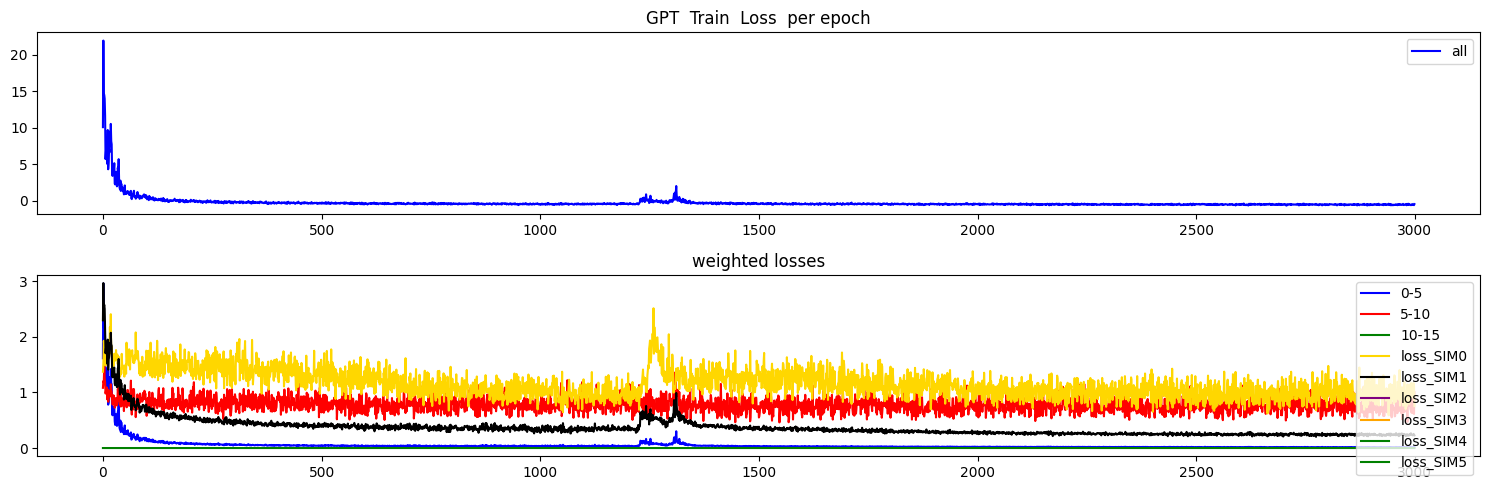

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.052674926817417145
Test MSE Loss - SI only 0-5:  0.02553936280310154
Test MSE Loss - SI only 5-10:  0.07512538135051727
Test MSE Loss - SI only 10-15:  0.08881206065416336
mae, mse, rmse, mape, mspe, rse, corr
(0.18646705, 0.052674927, 0.22951019, 10.130991, 1212.4792, 1.4616879)
Testing R**2 - SI only:  -1.1365318937579225
Testing R**2 - SI only:  -1.1365318937579225
Testing R**2 - All features:  0.6041381794480848
Testing R**2 - (f2) - SI full:  -0.234923620611857


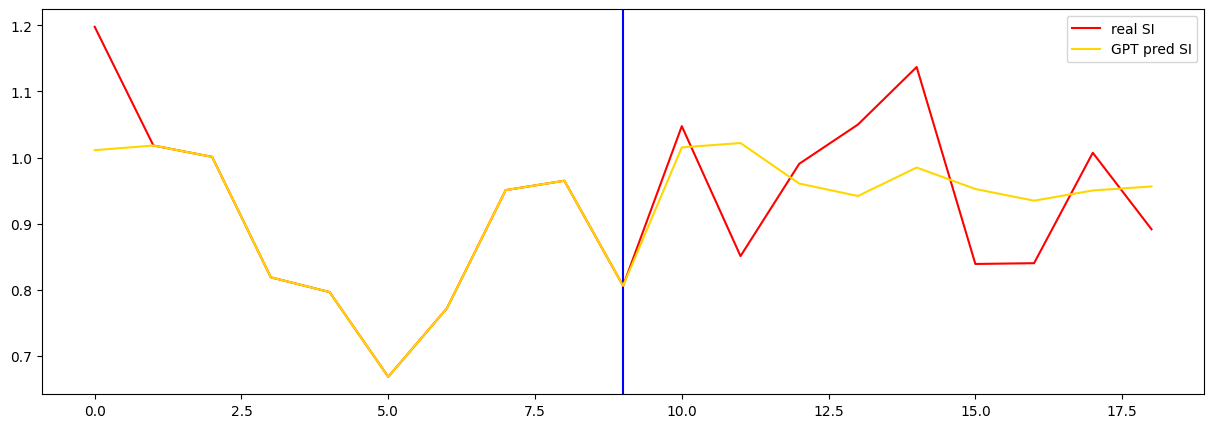

In [19]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  15.695379257202148
seq length of pred =  10
[1.44436232 2.4577938  4.71388514 9.92869228 1.1054889  0.55655166]
loss_SI... [tensor(2.2110, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1608, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(15.6954, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(15.6954, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.19212700426578522
seq length of pred =  10
[1.72662667 0.55137386 1.15242391 2.20464807 0.04629178 0.12248045]
loss_SI... [tensor(0.0926, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8174, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.1921, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.1921, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.23287346959114075
seq length of pred =  10
[1.29186499 0.39532879 0.77938405 1.46800047 0.0211191

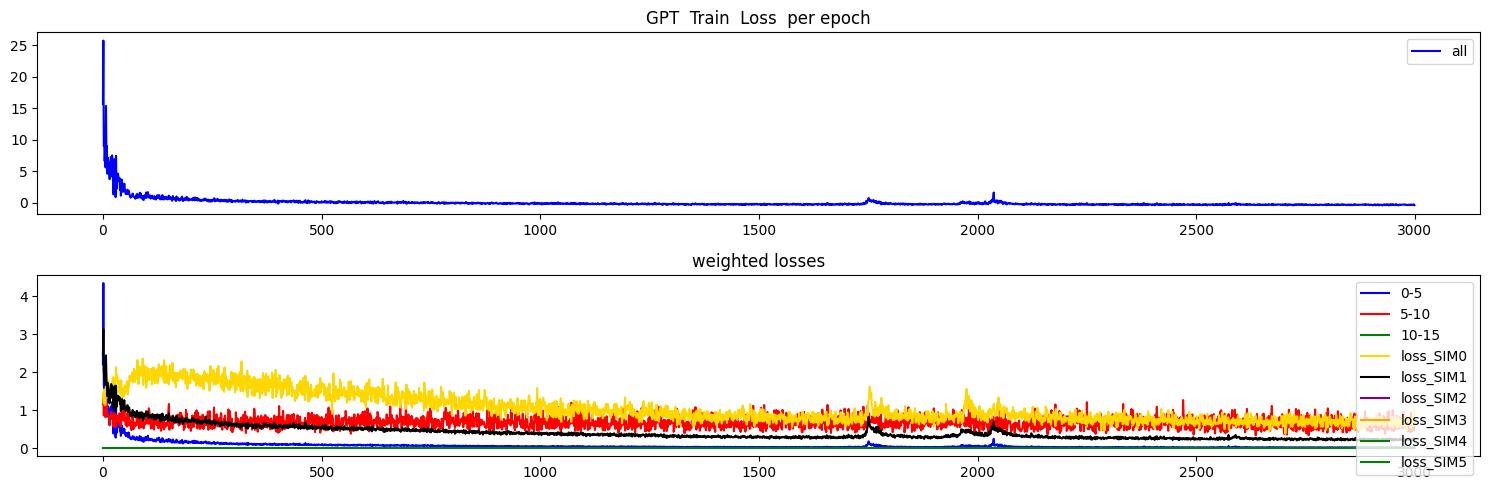

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.22948576509952545
Test MSE Loss - SI only 0-5:  0.02553936280310154
Test MSE Loss - SI only 5-10:  0.40801721811294556
Test MSE Loss - SI only 10-15:  0.4278014302253723
mae, mse, rmse, mape, mspe, rse, corr
(0.38124216, 0.22948577, 0.47904673, 31.291739, 14558.805, 3.050918)
Testing R**2 - SI only:  -8.308102126376825
Testing R**2 - SI only:  -8.308102126376825
Testing R**2 - All features:  0.8685088442618303
Testing R**2 - (f2) - SI full:  -3.4738400180363627


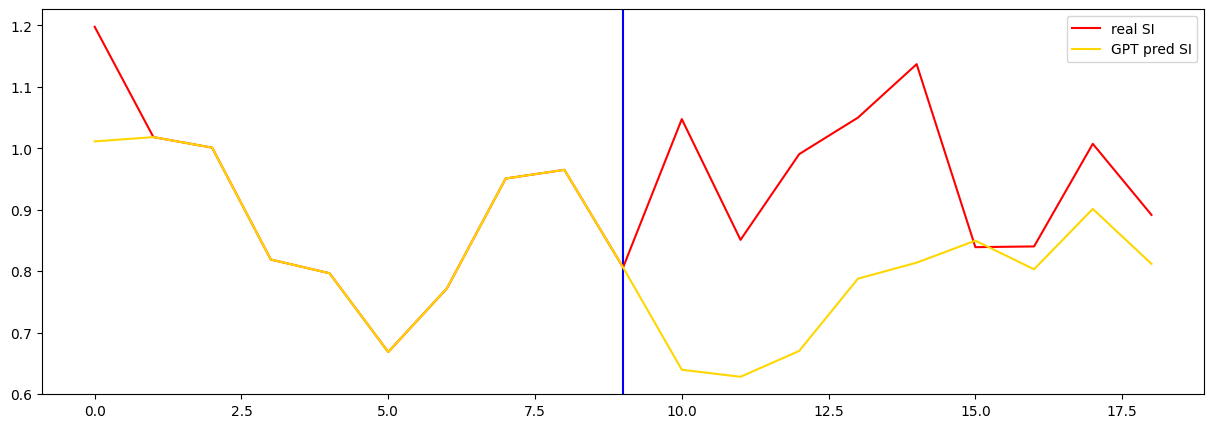

In [20]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  9.566905975341797
seq length of pred =  10
[1.45988085 1.94557877 4.91986928 7.84433935 0.7750436  0.4391581 ]
loss_SI... [tensor(1.5501, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.4372, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(9.5669, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(9.5669, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.5441229343414307
seq length of pred =  10
[2.05928633 0.72277813 1.50240497 2.75087842 0.0748955  0.15282658]
loss_SI... [tensor(0.1498, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.6283, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.5441, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.5441, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.12275708466768265
seq length of pred =  10
[1.05988412 0.52931404 1.08641214 1.92359818 0.03940804 0.1

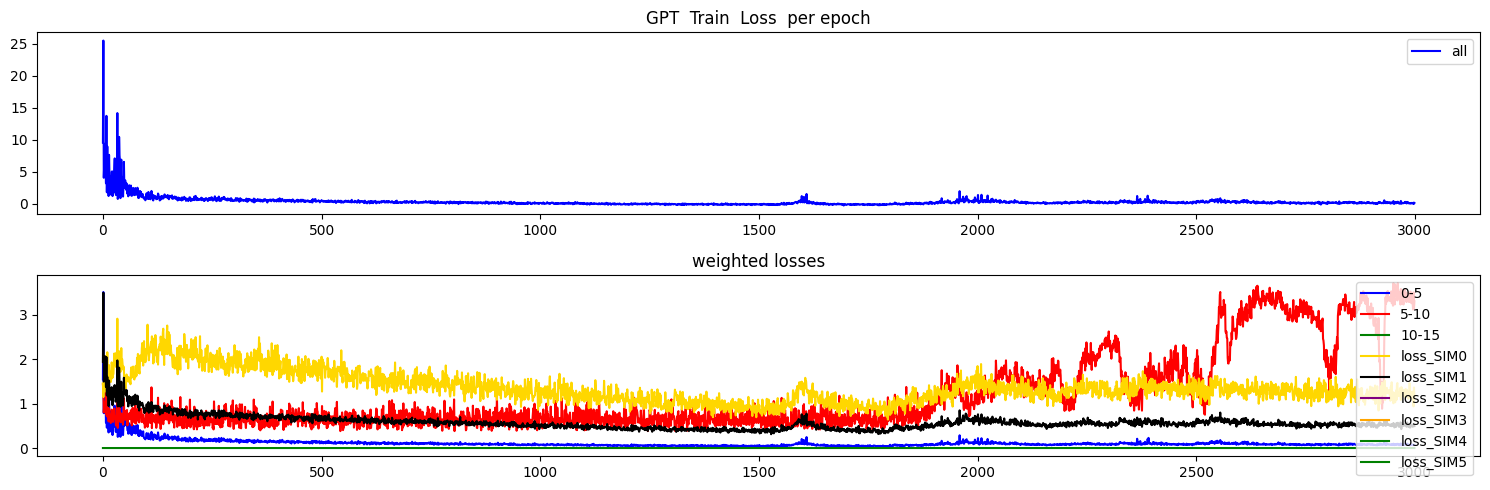

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.06777040660381317
Test MSE Loss - SI only 0-5:  0.02553936280310154
Test MSE Loss - SI only 5-10:  0.10574448108673096
Test MSE Loss - SI only 10-15:  0.11555574089288712
mae, mse, rmse, mape, mspe, rse, corr
(0.21236874, 0.06777041, 0.2603275, 13.138394, 2191.41, 1.6579552)
Testing R**2 - SI only:  -1.7488147625397983
Testing R**2 - SI only:  -1.7488147625397983
Testing R**2 - All features:  0.9968625860981242
Testing R**2 - (f2) - SI full:  -4.698146301996902


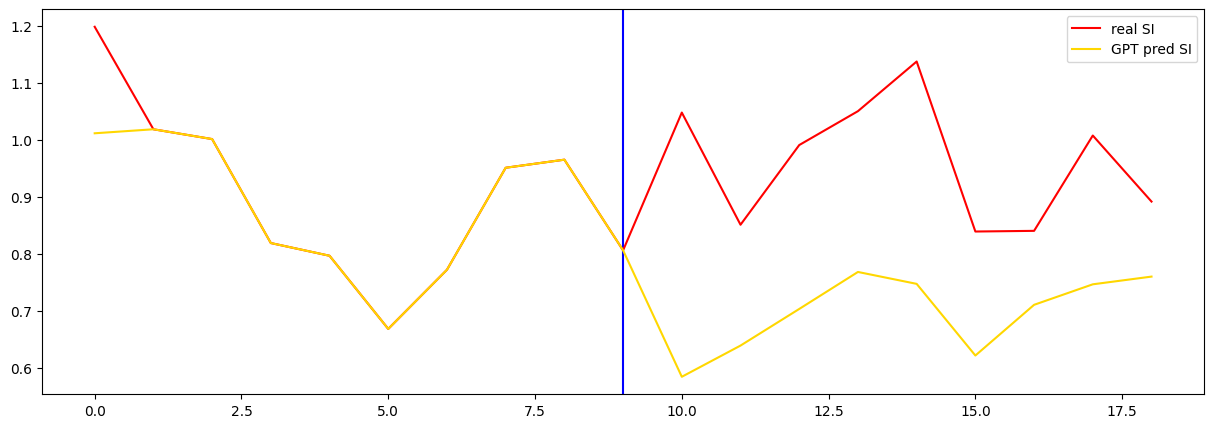

In [21]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  7.519230842590332
seq length of pred =  10
[1.14642001 1.98535675 3.64395766 8.31418161 0.76774837 0.47481542]
loss_SI... [tensor(1.5355, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.0696, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(7.5192, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(7.5192, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.767707109451294
seq length of pred =  10
[1.94786301 0.75926413 1.6662327  2.87054967 0.08560275 0.15947498]
loss_SI... [tensor(0.1712, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.5595, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.7677, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.7677, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.3014932870864868
seq length of pred =  10
[1.05754866 0.63538176 1.5063905  2.51077631 0.07562066 0.139

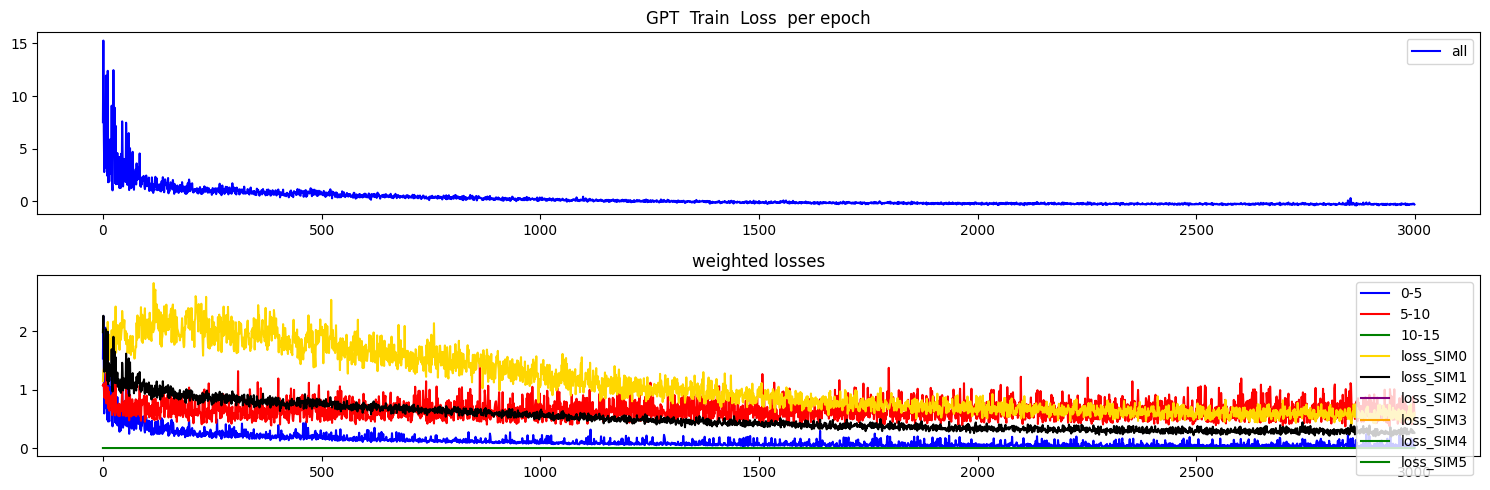

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.04220976680517197
Test MSE Loss - SI only 0-5:  0.02553936280310154
Test MSE Loss - SI only 5-10:  0.05027775838971138
Test MSE Loss - SI only 10-15:  0.07389204949140549
mae, mse, rmse, mape, mspe, rse, corr
(0.16421236, 0.042209763, 0.20545015, 12.505381, 2135.1125, 1.3084561)
Testing R**2 - SI only:  -0.7120574114349623
Testing R**2 - SI only:  -0.7120574114349623
Testing R**2 - All features:  0.989312720210617
Testing R**2 - (f2) - SI full:  -23.414186777365497


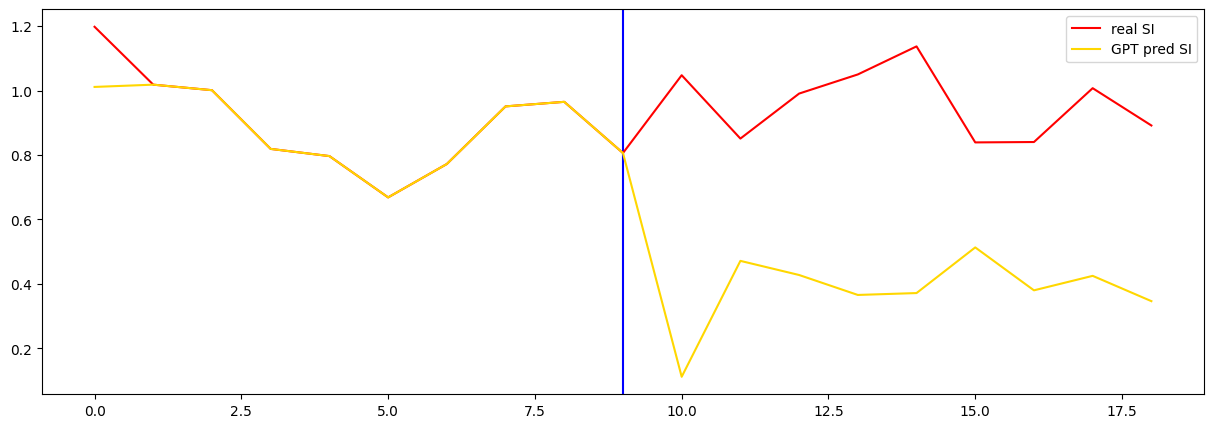

In [22]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )



## Run 2


In [23]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  8.441925048828125
seq length of pred =  10
[1.48848489 1.87592132 4.95819144 9.04233782 0.90348955 0.52743003]
loss_SI... [tensor(1.8070, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.2345, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(8.4419, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(8.4419, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  -0.02403228171169758
seq length of pred =  10
[0.71733656 0.40879542 0.93633397 1.76247242 0.06802078 0.10176656]
loss_SI... [tensor(0.1360, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7840, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(-0.0240, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(-0.0240, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.13831695914268494
seq length of pred =  10
[0.49913082 0.47533022 1.34935849 2.05126359 0.1889631

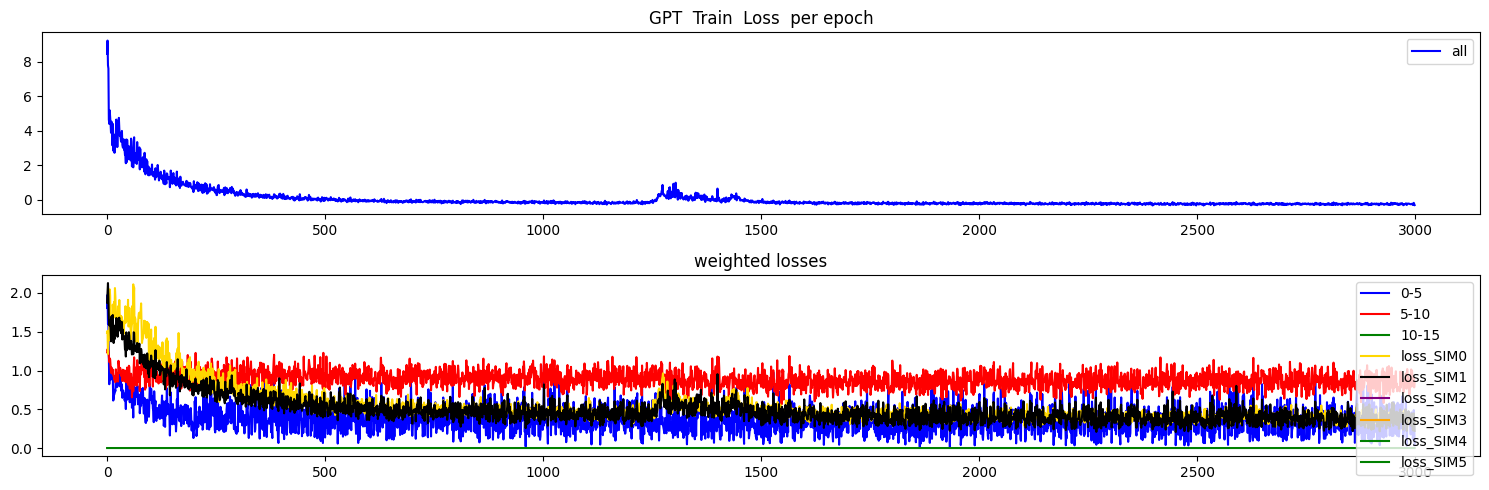

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.14432546496391296
Test MSE Loss - SI only 0-5:  0.023228609934449196
Test MSE Loss - SI only 5-10:  0.1395895928144455
Test MSE Loss - SI only 10-15:  0.09117187559604645
mae, mse, rmse, mape, mspe, rse, corr
(0.28242105, 0.14432546, 0.37990192, 3.3005545, 33.338333, 1.791993)
Testing R**2 - SI only:  -2.2112383887304485
Testing R**2 - SI only:  -2.2112383887304485
Testing R**2 - All features:  0.7781691198724177
Testing R**2 - (f2) - SI full:  -1.8888897682538754


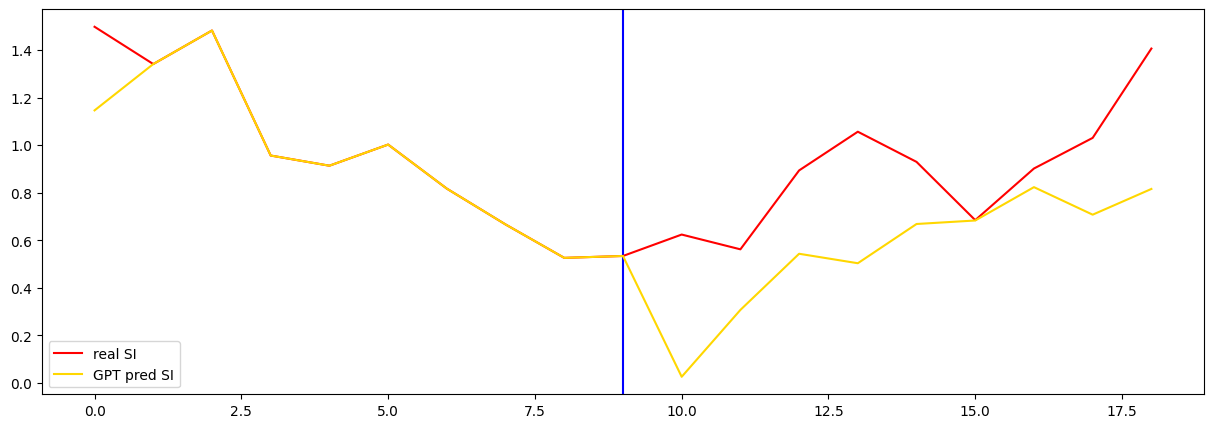

In [24]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  12.560405731201172
seq length of pred =  10
[ 1.31428243  2.17954997  4.40616025 11.39163093  1.36369317  0.67227544]
loss_SI... [tensor(2.7274, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.4138, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(12.5604, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(12.5604, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.6456729173660278
seq length of pred =  10
[0.9825659  0.70760731 1.97568272 3.12558663 0.24295589 0.197419  ]
loss_SI... [tensor(0.4859, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7827, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.6457, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.6457, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.3310283422470093
seq length of pred =  10
[0.68923562 0.70518931 2.29422049 3.26859476 0.4221

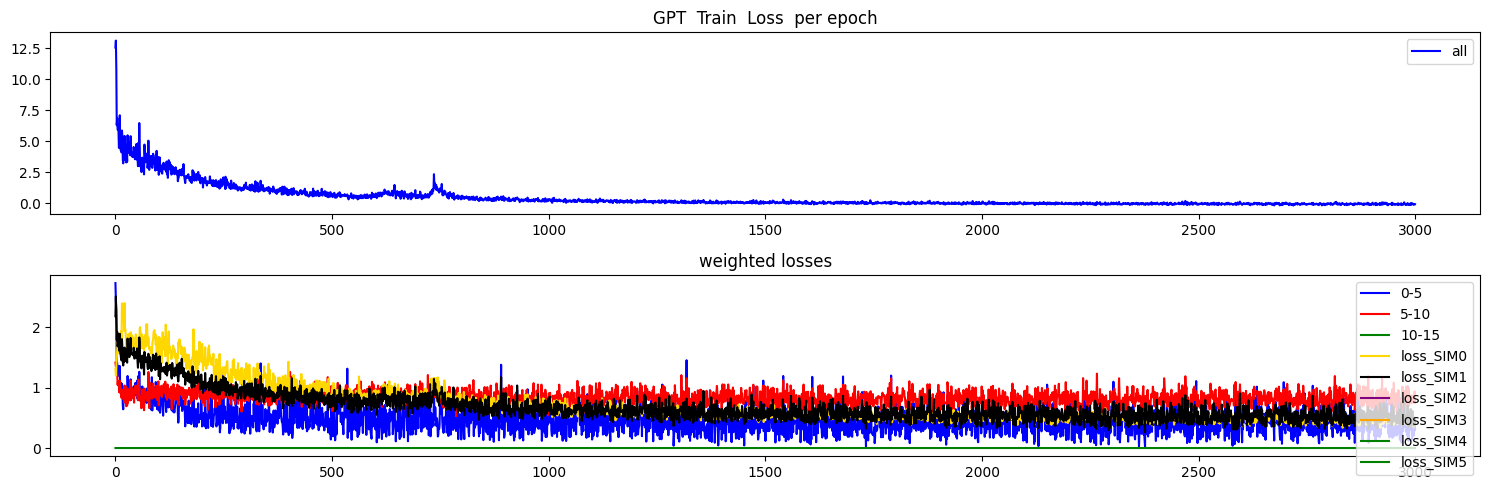

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.10406547039747238
Test MSE Loss - SI only 0-5:  0.023228609934449196
Test MSE Loss - SI only 5-10:  0.03647860139608383
Test MSE Loss - SI only 10-15:  0.041294895112514496
mae, mse, rmse, mape, mspe, rse, corr
(0.22522336, 0.10406548, 0.3225918, 2.4792402, 26.898638, 1.5216616)
Testing R**2 - SI only:  -1.3154544707842475
Testing R**2 - SI only:  -1.3154544707842475
Testing R**2 - All features:  0.9102603554188912
Testing R**2 - (f2) - SI full:  0.1859285387304176


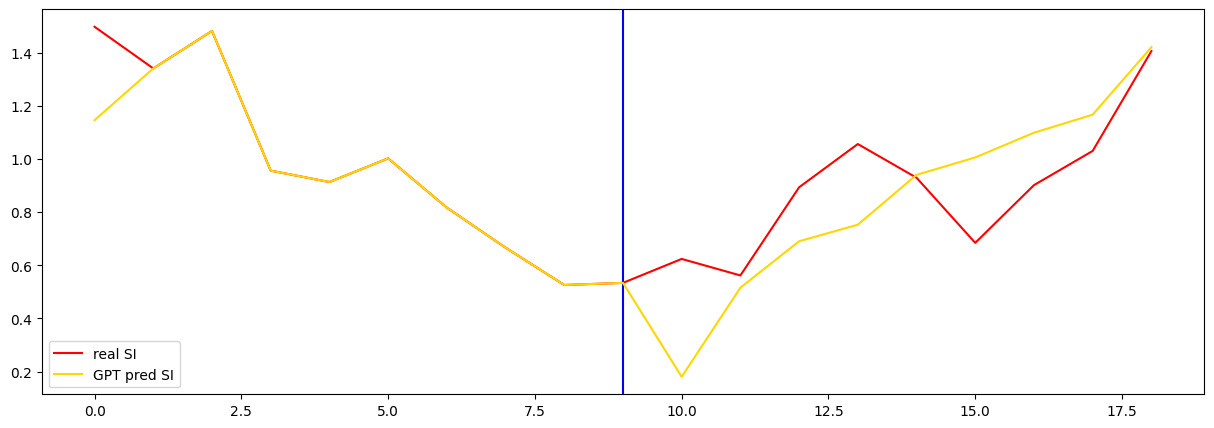

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  6.44033145904541
seq length of pred =  10
[1.35622167 1.80483217 4.27623558 8.48914915 0.69650089 0.48132365]
loss_SI... [tensor(1.3930, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.2262, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(6.4403, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(6.4403, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.2659509181976318
seq length of pred =  10
[1.13579629 1.13995347 2.6229445  5.07642581 0.36119461 0.29739529]
loss_SI... [tensor(0.7224, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8429, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.2660, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.2660, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.5189331769943237
seq length of pred =  10
[0.83660099 0.9761149  2.54358588 4.64111234 0.37016928 0.281

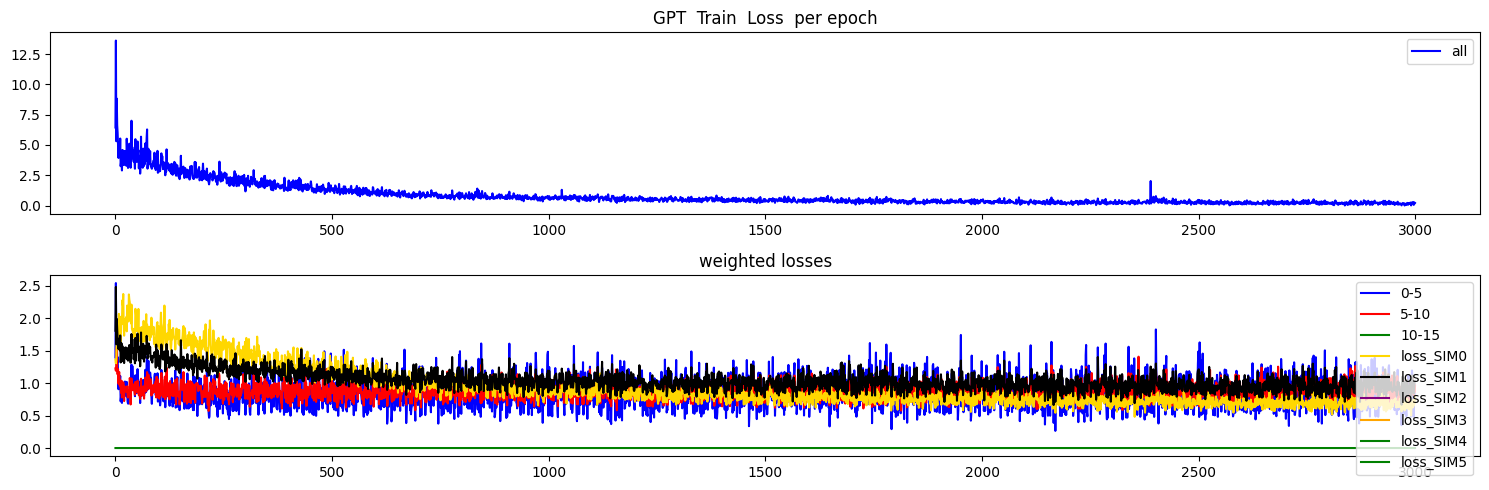

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.10189110040664673
Test MSE Loss - SI only 0-5:  0.023228609934449196
Test MSE Loss - SI only 5-10:  0.027851823717355728
Test MSE Loss - SI only 10-15:  0.041659075766801834
mae, mse, rmse, mape, mspe, rse, corr
(0.22231865, 0.1018911, 0.31920385, 2.601884, 27.515545, 1.5056809)
Testing R**2 - SI only:  -1.2670748249831232
Testing R**2 - SI only:  -1.2670748249831232
Testing R**2 - All features:  0.8563802006077784
Testing R**2 - (f2) - SI full:  -0.30144564852016975


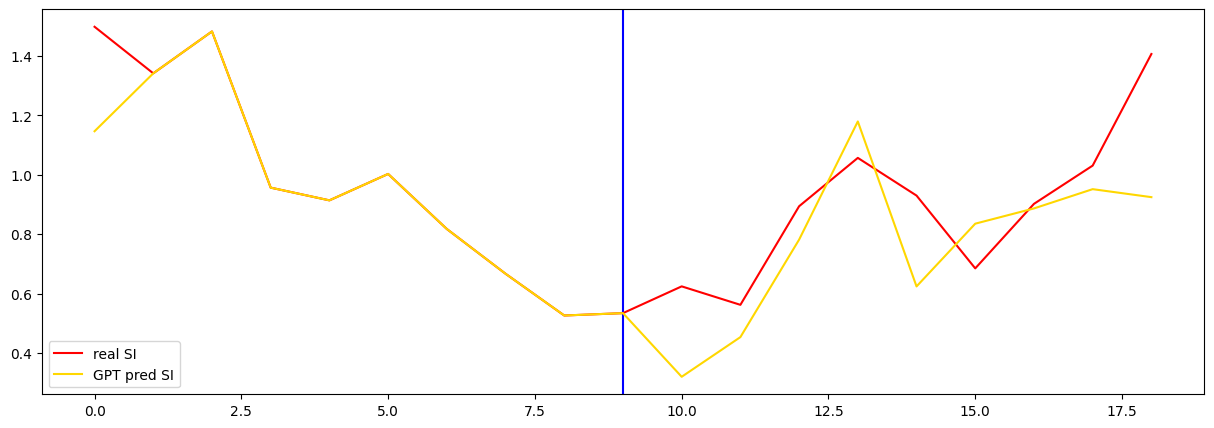

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  9.991144180297852
seq length of pred =  10
[1.29532488 2.08802063 4.73705583 9.48147997 0.99359992 0.54692567]
loss_SI... [tensor(1.9872, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.3087, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(9.9911, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(9.9911, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.548693060874939
seq length of pred =  10
[1.24467868 1.03081203 2.40574021 4.50424564 0.3205053  0.26792733]
loss_SI... [tensor(0.6410, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8202, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.5487, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.5487, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.976982831954956
seq length of pred =  10
[0.93521586 0.8167947  1.91816329 3.5595716  0.27133129 0.2219

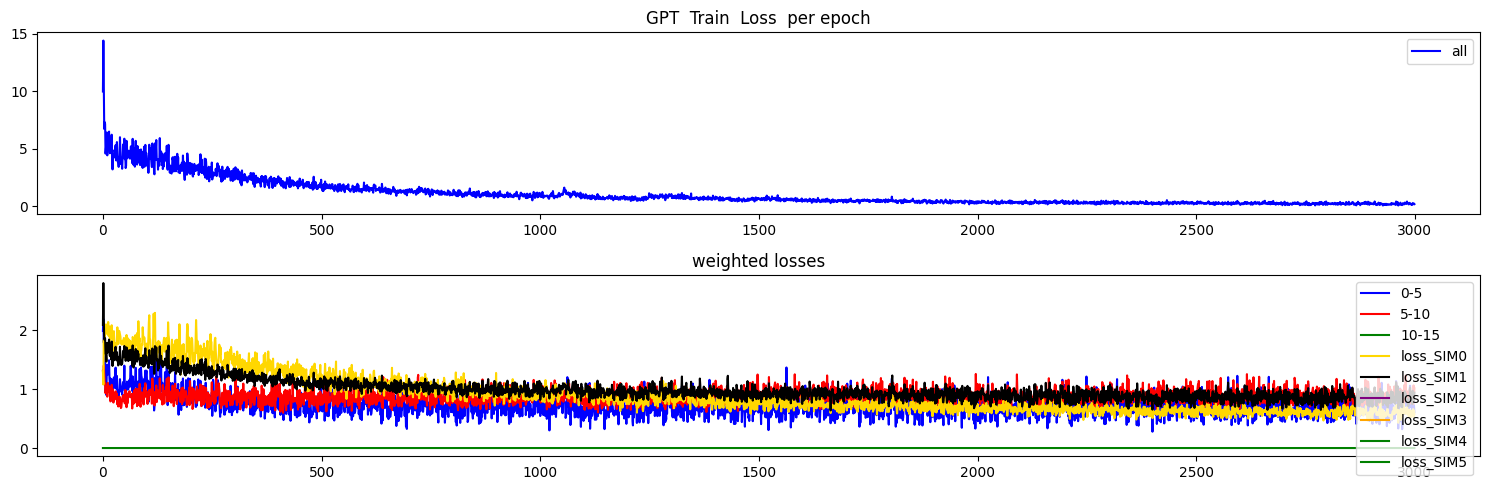

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.1369124948978424
Test MSE Loss - SI only 0-5:  0.023228609934449196
Test MSE Loss - SI only 5-10:  0.11961698532104492
Test MSE Loss - SI only 10-15:  0.08297519385814667
mae, mse, rmse, mape, mspe, rse, corr
(0.28407097, 0.1369125, 0.37001687, 2.91965, 28.217783, 1.7453654)
Testing R**2 - SI only:  -2.0463000336847568
Testing R**2 - SI only:  -2.0463000336847568
Testing R**2 - All features:  0.8460545490425866
Testing R**2 - (f2) - SI full:  -0.3953869429271497


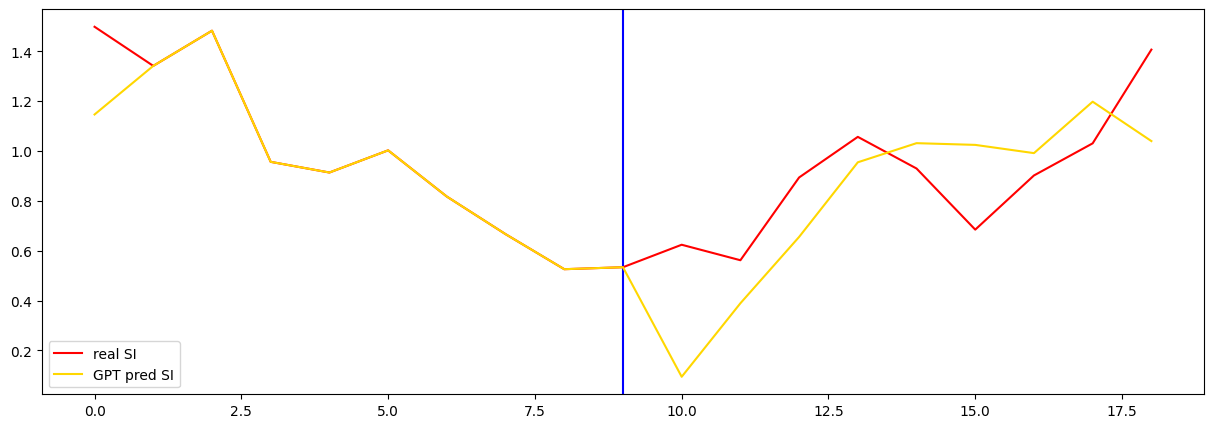

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )



## Run 3


In [28]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  8.25762939453125
seq length of pred =  10
[1.31867263 1.80589603 3.54898481 9.46996653 0.86889794 0.54826793]
loss_SI... [tensor(1.7378, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.4085, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(8.2576, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(8.2576, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.35101747512817383
seq length of pred =  10
[0.67436377 0.87191167 2.14764589 3.91390636 0.30187894 0.22818955]
loss_SI... [tensor(0.6038, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.9263, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.3510, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.3510, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.14834579825401306
seq length of pred =  10
[0.6072564  0.74270586 1.8115435  3.20307997 0.23480228 0.1

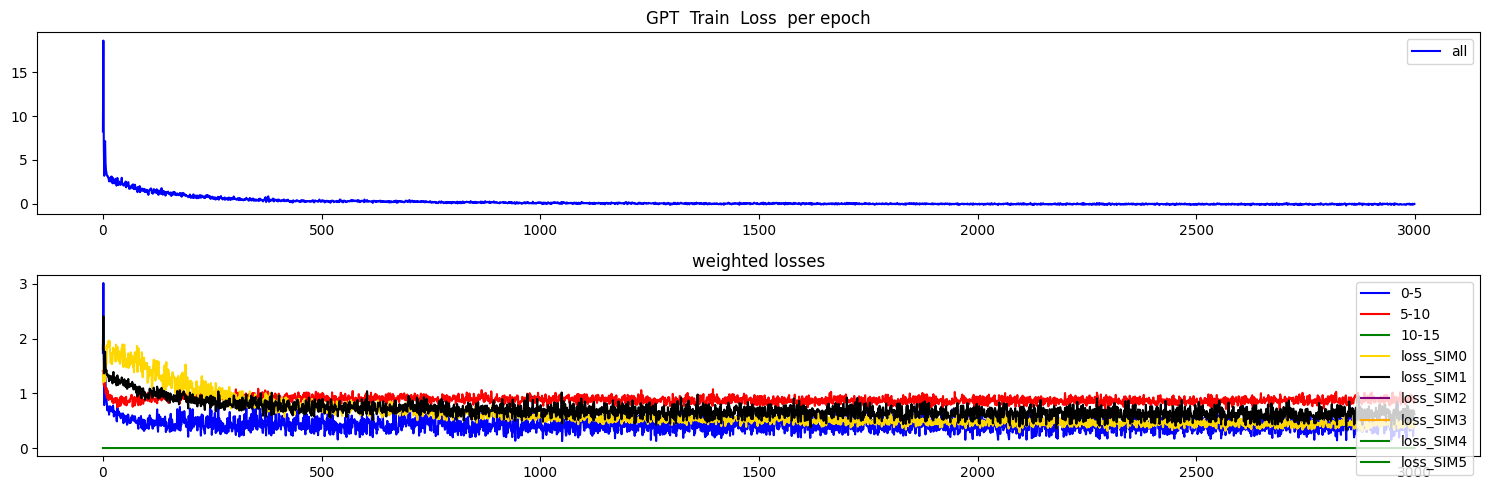

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.07888434827327728
Test MSE Loss - SI only 0-5:  0.08890785276889801
Test MSE Loss - SI only 5-10:  0.024225953966379166
Test MSE Loss - SI only 10-15:  0.16093650460243225
mae, mse, rmse, mape, mspe, rse, corr
(0.20276305, 0.07888435, 0.28086358, 25.33169, 7519.3086, 1.1521611)
Testing R**2 - SI only:  -0.3274752722651906
Testing R**2 - SI only:  -0.3274752722651906
Testing R**2 - All features:  0.9902362677064874
Testing R**2 - (f2) - SI full:  0.061740269266583825


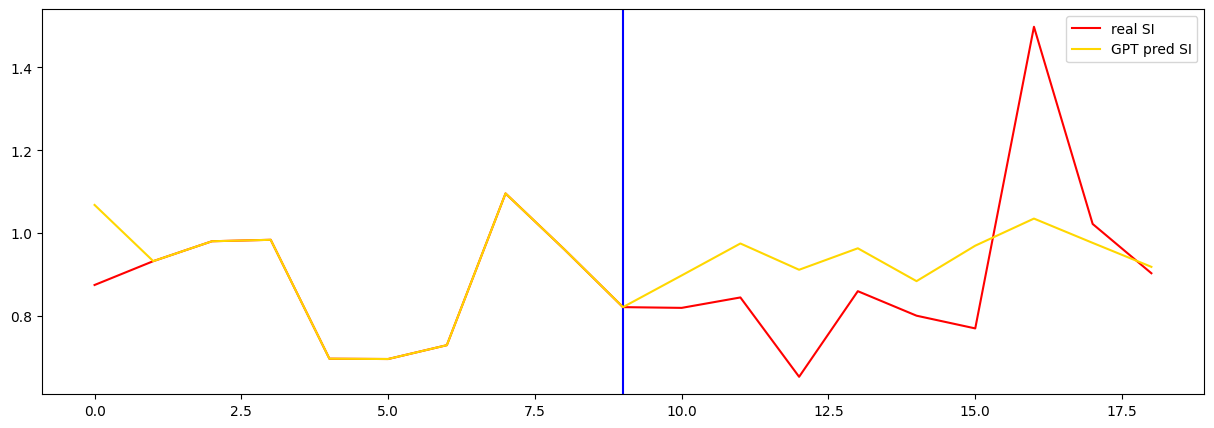

In [29]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  8.124874114990234
seq length of pred =  10
[1.45050494 1.80552175 4.41760401 8.92260737 0.74984633 0.50495954]
loss_SI... [tensor(1.4997, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.9565, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(8.1249, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(8.1249, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.1685761958360672
seq length of pred =  10
[1.02482834 0.57787663 1.08877389 2.04708252 0.04423458 0.11372681]
loss_SI... [tensor(0.0885, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.9360, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.1686, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.1686, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.17918801307678223
seq length of pred =  10
[0.89967655 0.36557644 0.74749154 1.49901498 0.02705501 0.

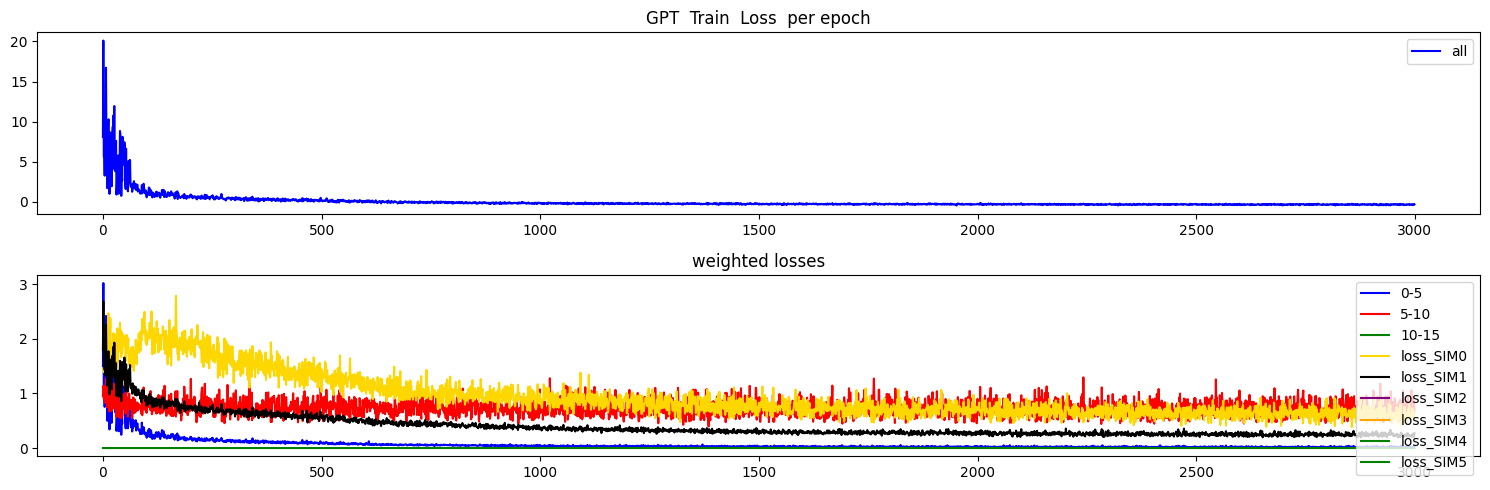

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.08718452602624893
Test MSE Loss - SI only 0-5:  0.08890785276889801
Test MSE Loss - SI only 5-10:  0.03735985606908798
Test MSE Loss - SI only 10-15:  0.17934328317642212
mae, mse, rmse, mape, mspe, rse, corr
(0.2090225, 0.087184526, 0.29527026, 25.884352, 7523.686, 1.2112603)
Testing R**2 - SI only:  -0.4671517113273942
Testing R**2 - SI only:  -0.4671517113273942
Testing R**2 - All features:  0.9851228288391648
Testing R**2 - (f2) - SI full:  -7.939543034807141


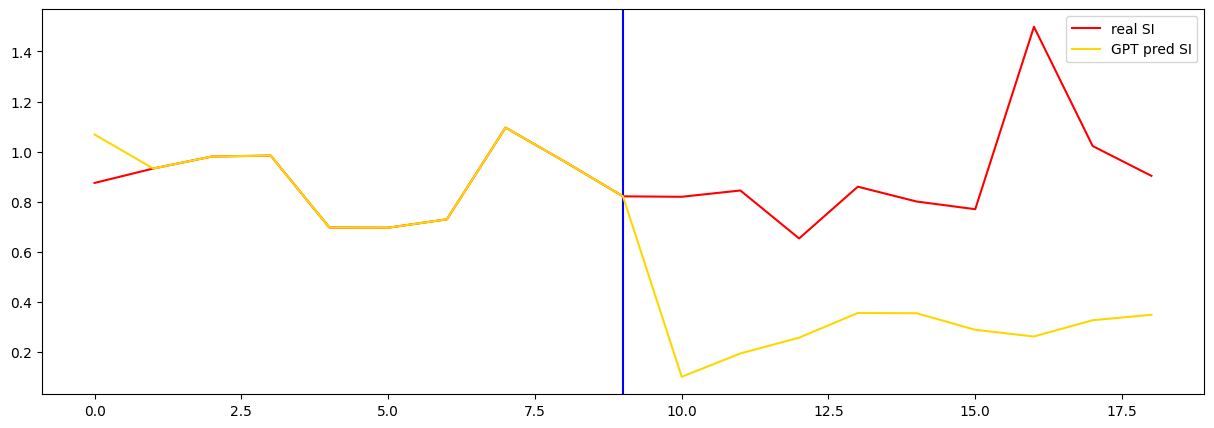

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  10.250123023986816
seq length of pred =  10
[1.4881441  1.95873976 3.43371386 7.6742515  0.86924827 0.43535594]
loss_SI... [tensor(1.7385, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1866, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(10.2501, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(10.2501, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.4415181279182434
seq length of pred =  10
[1.38265621 0.91243617 2.44709413 4.50260963 0.79682319 0.3021982 ]
loss_SI... [tensor(1.5936, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8035, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.4415, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.4415, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.31984615325927734
seq length of pred =  10
[1.21869906 0.99022181 2.53622314 4.55027347 0.82130319 

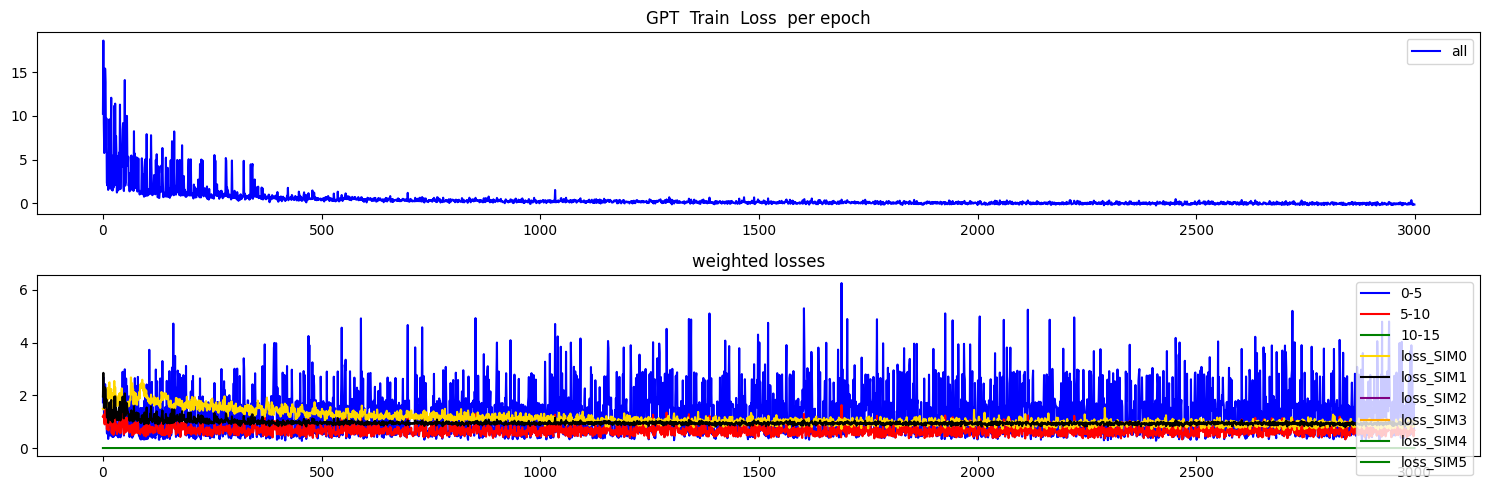

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.10764780640602112
Test MSE Loss - SI only 0-5:  0.08890785276889801
Test MSE Loss - SI only 5-10:  0.08147688955068588
Test MSE Loss - SI only 10-15:  0.21298670768737793
mae, mse, rmse, mape, mspe, rse, corr
(0.27177978, 0.10764781, 0.32809725, 27.071161, 7536.8813, 1.3459235)
Testing R**2 - SI only:  -0.8115102166382018
Testing R**2 - SI only:  -0.8115102166382018
Testing R**2 - All features:  0.9278310432656323
Testing R**2 - (f2) - SI full:  -13.701810836417254


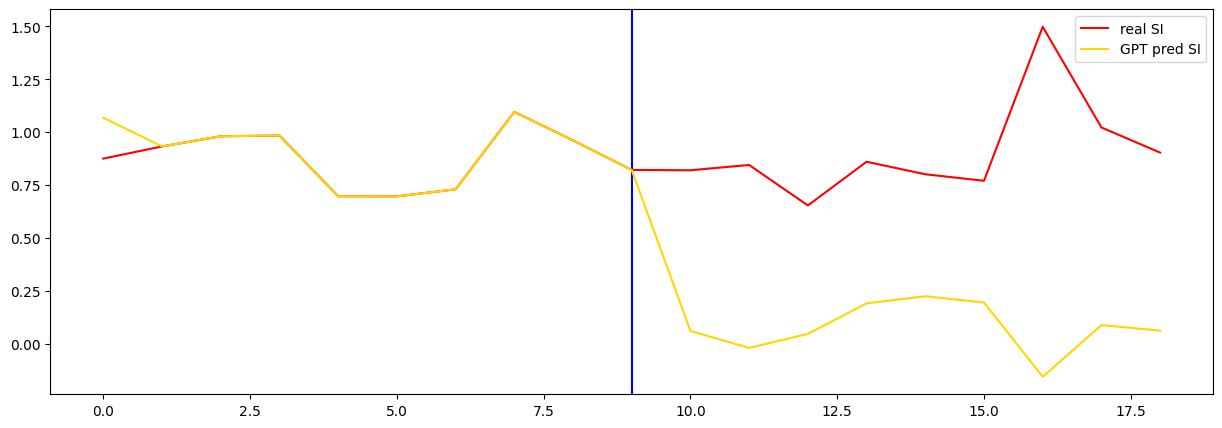

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  6.695408821105957
seq length of pred =  10
[1.45168818 1.7045783  2.80306692 7.78767175 0.56322427 0.43520169]
loss_SI... [tensor(1.1264, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.9707, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(6.6954, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(6.6954, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.1044238805770874
seq length of pred =  10
[1.95871714 0.94793497 1.93695101 3.52709017 0.17174223 0.19826252]
loss_SI... [tensor(0.3435, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.5523, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.1044, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.1044, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.40280428528785706
seq length of pred =  10
[1.87993358 0.75438227 1.66370641 2.78788962 0.10399608 0.1

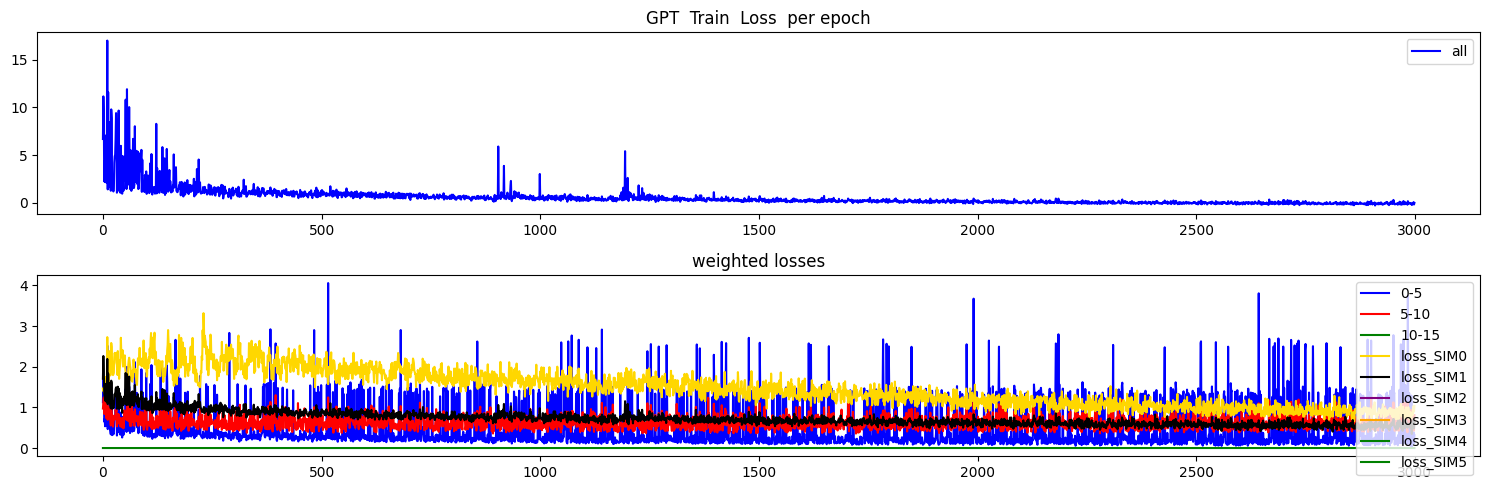

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.0746028944849968
Test MSE Loss - SI only 0-5:  0.08890785276889801
Test MSE Loss - SI only 5-10:  0.019749319180846214
Test MSE Loss - SI only 10-15:  0.14914357662200928
mae, mse, rmse, mape, mspe, rse, corr
(0.19675612, 0.074602894, 0.2731353, 25.237232, 7518.662, 1.1204581)
Testing R**2 - SI only:  -0.2554262969548542
Testing R**2 - SI only:  -0.2554262969548542
Testing R**2 - All features:  0.9910438981340552
Testing R**2 - (f2) - SI full:  -13.15678829059689


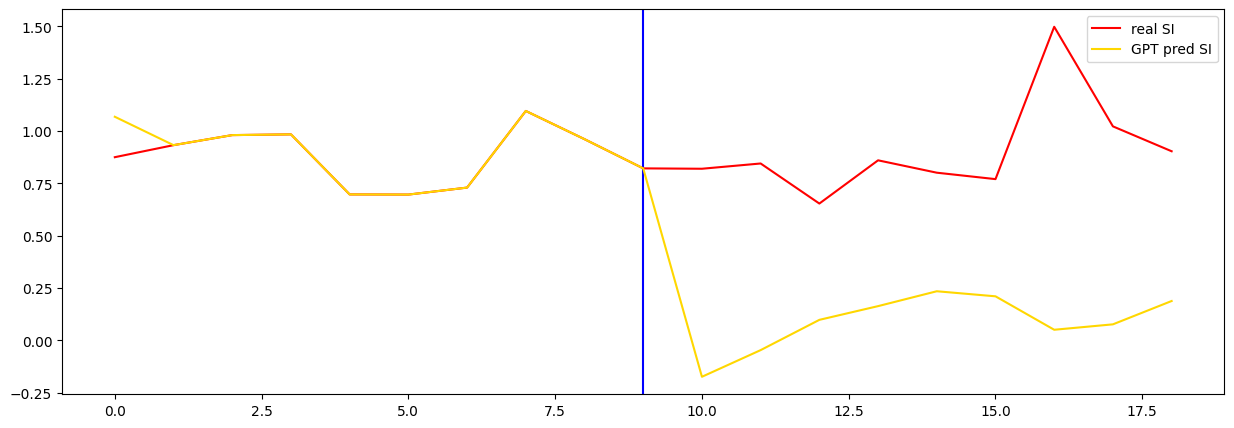

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )



## Run 4


In [33]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  9.311614036560059
seq length of pred =  10
[1.31286366 2.09104553 5.2788502  9.76198019 1.13371611 0.58122232]
loss_SI... [tensor(2.2674, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.4001, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(9.3116, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(9.3116, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.15848568081855774
seq length of pred =  10
[0.48867004 0.4964751  1.38037665 1.92819521 0.15892735 0.12014864]
loss_SI... [tensor(0.3179, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8547, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.1585, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.1585, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  -0.0042961109429597855
seq length of pred =  10
[0.3213143  0.2839996  0.60760823 1.03381052 0.04412243

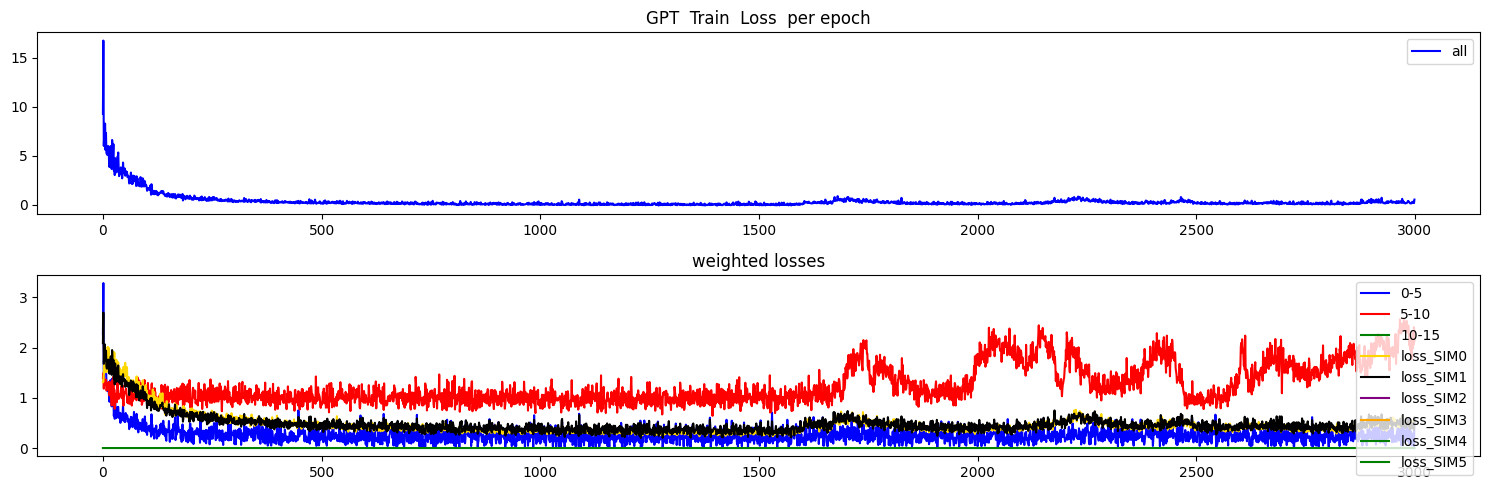

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.0488135926425457
Test MSE Loss - SI only 0-5:  0.019283656030893326
Test MSE Loss - SI only 5-10:  0.05441254377365112
Test MSE Loss - SI only 10-15:  0.03853302076458931
mae, mse, rmse, mape, mspe, rse, corr
(0.17963675, 0.048813593, 0.22093798, 2.570419, 11.793425, 1.6812631)
Testing R**2 - SI only:  -1.826645621647034
Testing R**2 - SI only:  -1.826645621647034
Testing R**2 - All features:  0.9604326072061659
Testing R**2 - (f2) - SI full:  -0.4502548835443678


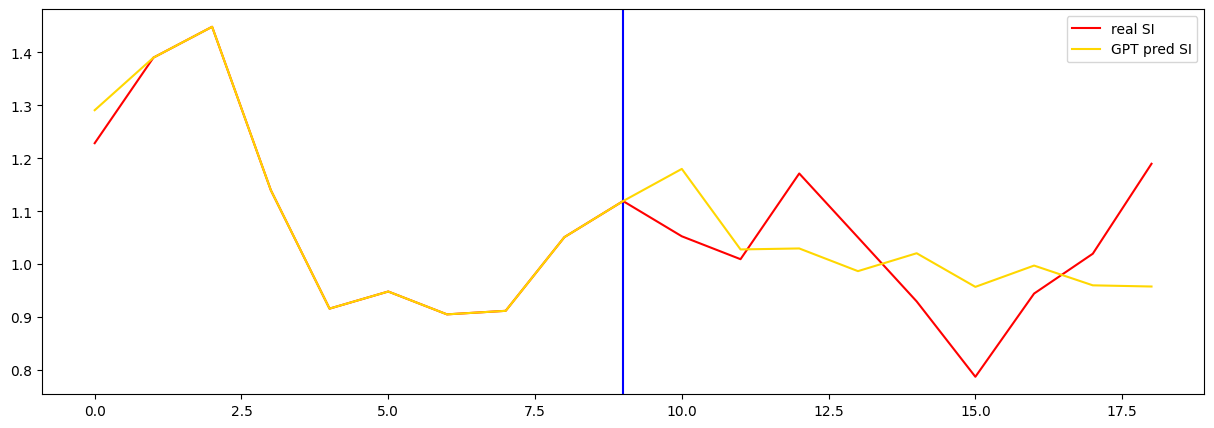

In [34]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  8.37360954284668
seq length of pred =  10
[1.91914619 1.98895309 4.60053423 9.03504653 0.86251881 0.51852697]
loss_SI... [tensor(1.7250, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.6662, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(8.3736, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(8.3736, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.7873376607894897
seq length of pred =  10
[0.80613826 1.04119838 2.75312423 4.60947953 0.404154   0.27936295]
loss_SI... [tensor(0.8083, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8697, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.7873, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.7873, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.5000165700912476
seq length of pred =  10
[0.68402291 0.96595144 2.81746874 4.27445216 0.46139546 0.265

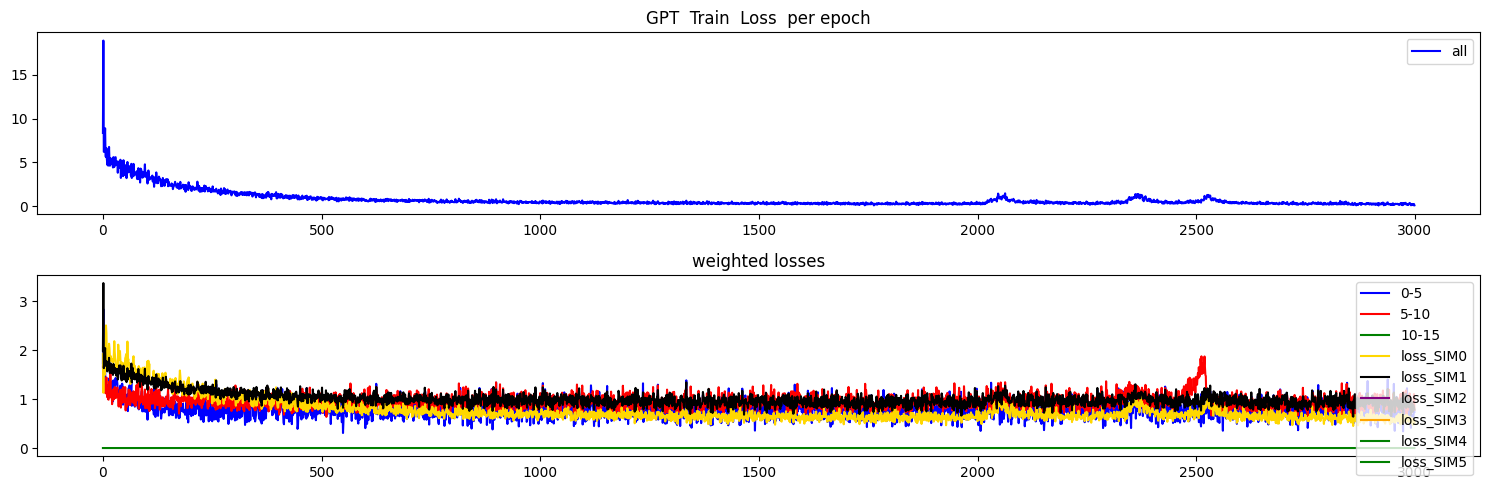

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.03388957306742668
Test MSE Loss - SI only 0-5:  0.019283656030893326
Test MSE Loss - SI only 5-10:  0.016349880024790764
Test MSE Loss - SI only 10-15:  0.01988440752029419
mae, mse, rmse, mape, mspe, rse, corr
(0.14710854, 0.033889573, 0.18409121, 2.0276215, 8.827718, 1.4008718)
Testing R**2 - SI only:  -0.9624413156423441
Testing R**2 - SI only:  -0.9624413156423441
Testing R**2 - All features:  0.9657329768243225
Testing R**2 - (f2) - SI full:  -2.416371781785038


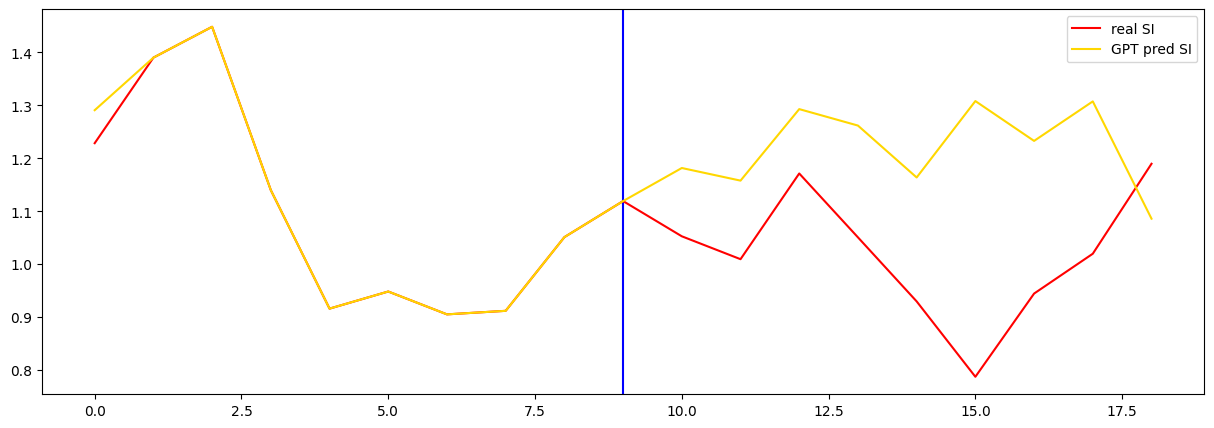

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  9.537979125976562
seq length of pred =  10
[ 1.60123661  2.29959718  5.63733403 10.19938247  1.20070739  0.59963861]
loss_SI... [tensor(2.4014, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.5086, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(9.5380, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(9.5380, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.9497344493865967
seq length of pred =  10
[1.05035466 1.10060998 2.69314309 5.29890229 0.44940844 0.32744325]
loss_SI... [tensor(0.8988, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.5182, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.9497, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.9497, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  1.214733362197876
seq length of pred =  10
[0.84969612 1.06546612 2.69187036 5.01492492 0.50539588

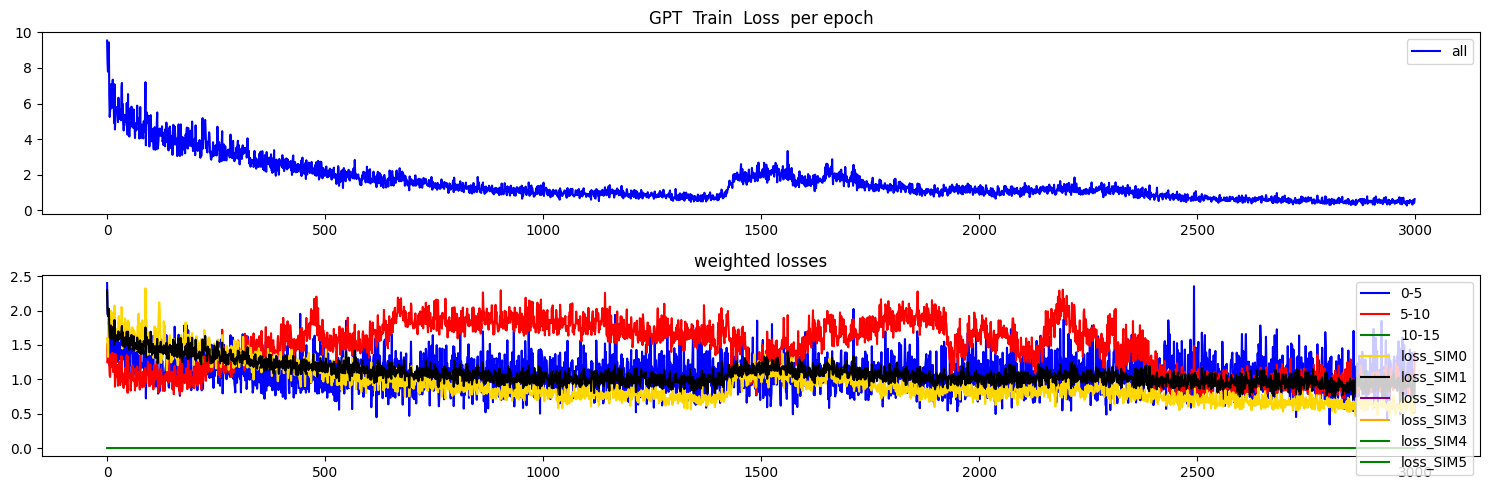

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.051538337022066116
Test MSE Loss - SI only 0-5:  0.019283656030893326
Test MSE Loss - SI only 5-10:  0.0479726605117321
Test MSE Loss - SI only 10-15:  0.055326931178569794
mae, mse, rmse, mape, mspe, rse, corr
(0.17955789, 0.05153834, 0.22702058, 2.425925, 10.99867, 1.7275497)
Testing R**2 - SI only:  -1.9844271698329732
Testing R**2 - SI only:  -1.9844271698329732
Testing R**2 - All features:  0.9567577370498628
Testing R**2 - (f2) - SI full:  -2.537989065291622


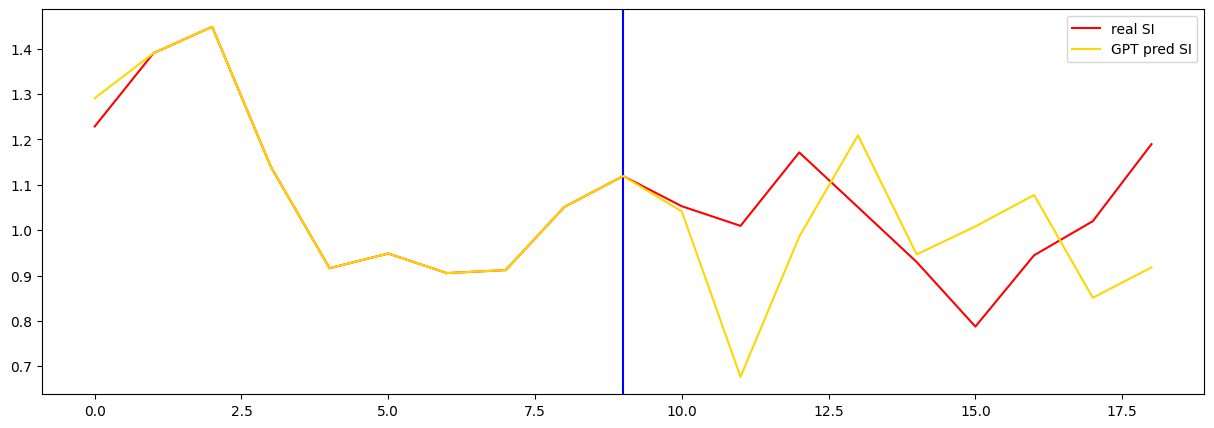

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  6.479828834533691
seq length of pred =  10
[1.43544584 1.69571611 3.93696039 8.17848698 0.72983503 0.47451652]
loss_SI... [tensor(1.4597, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1169, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(6.4798, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(6.4798, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  2.1262080669403076
seq length of pred =  10
[1.36757031 1.17481096 2.98656111 6.2307448  0.50647164 0.37384103]
loss_SI... [tensor(1.0129, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7448, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(2.1262, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(2.1262, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  1.1494662761688232
seq length of pred =  10
[1.10187179 1.18385896 3.10415094 5.22874704 0.44480267 0.31

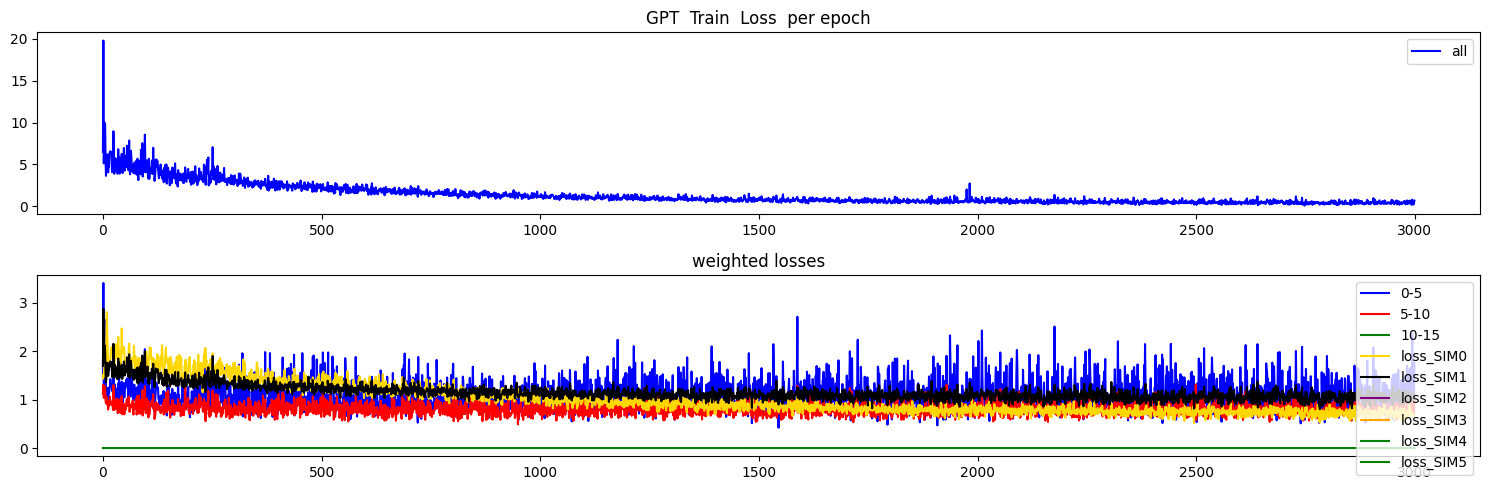

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.03838301822543144
Test MSE Loss - SI only 0-5:  0.019283656030893326
Test MSE Loss - SI only 5-10:  0.022080834954977036
Test MSE Loss - SI only 10-15:  0.031228523701429367
mae, mse, rmse, mape, mspe, rse, corr
(0.15278982, 0.03838301, 0.19591583, 2.1615837, 9.542875, 1.490853)
Testing R**2 - SI only:  -1.2226425834045909
Testing R**2 - SI only:  -1.2226425834045909
Testing R**2 - All features:  0.9229524271190257
Testing R**2 - (f2) - SI full:  -1.219679144367543


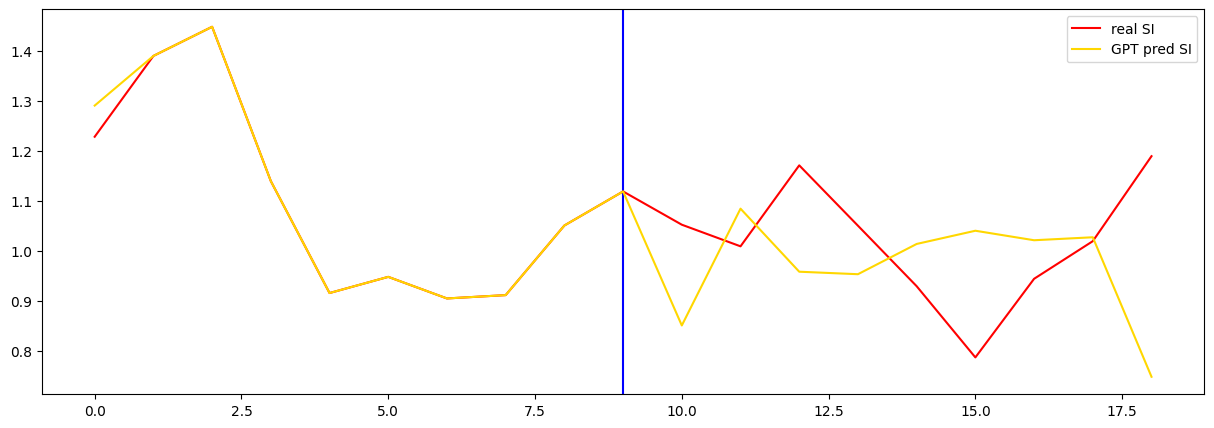

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )



## Run 5


In [38]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


0 train loss =  7.404523849487305
seq length of pred =  10
[1.63235041 1.85513162 4.42337048 9.12088352 0.78805017 0.51670037]
loss_SI... [tensor(1.5761, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.4055, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(7.4045, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(7.4045, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  0.5763963460922241
seq length of pred =  10
[0.70626571 0.85432536 2.01296319 3.59891612 0.23445134 0.21249415]
loss_SI... [tensor(0.4689, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.8761, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(0.5764, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(0.5764, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.2372896522283554
seq length of pred =  10
[0.52230727 0.67528059 1.66738106 2.94285303 0.26206807 0.19

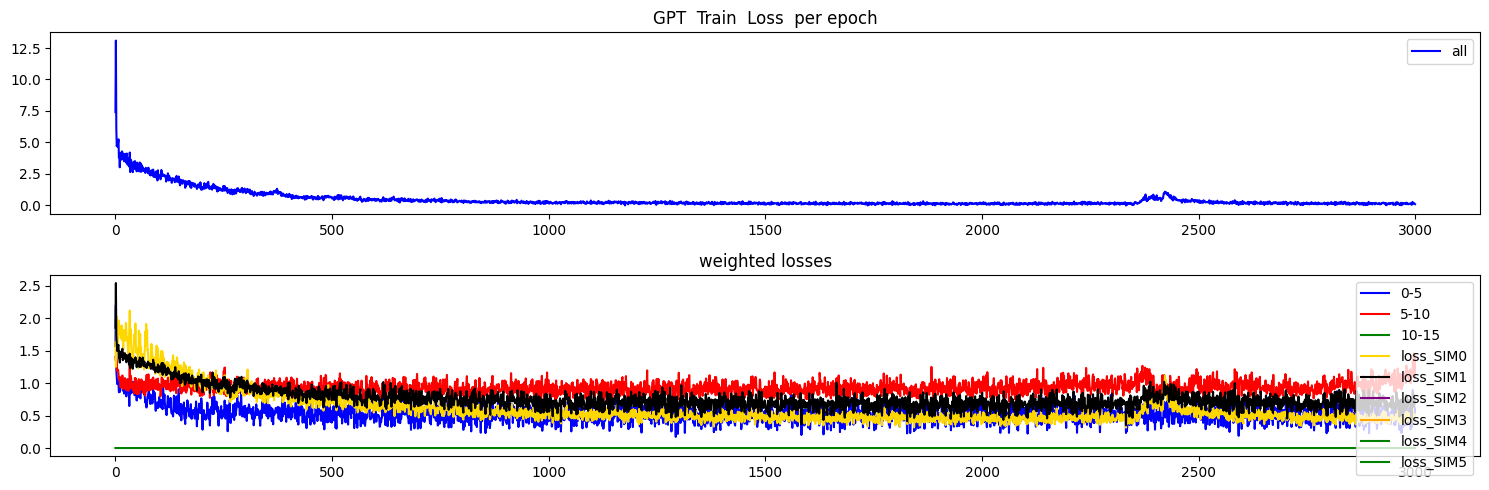

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.05062427744269371
Test MSE Loss - SI only 0-5:  0.0463593527674675
Test MSE Loss - SI only 5-10:  0.03894810378551483
Test MSE Loss - SI only 10-15:  0.055788833647966385
mae, mse, rmse, mape, mspe, rse, corr
(0.20193382, 0.050624277, 0.2249984, 16.679115, 3512.1633, 1.5674199)
Testing R**2 - SI only:  -1.4568049429720262
Testing R**2 - SI only:  -1.4568049429720262
Testing R**2 - All features:  0.9955388258040104
Testing R**2 - (f2) - SI full:  -0.8020514469990154


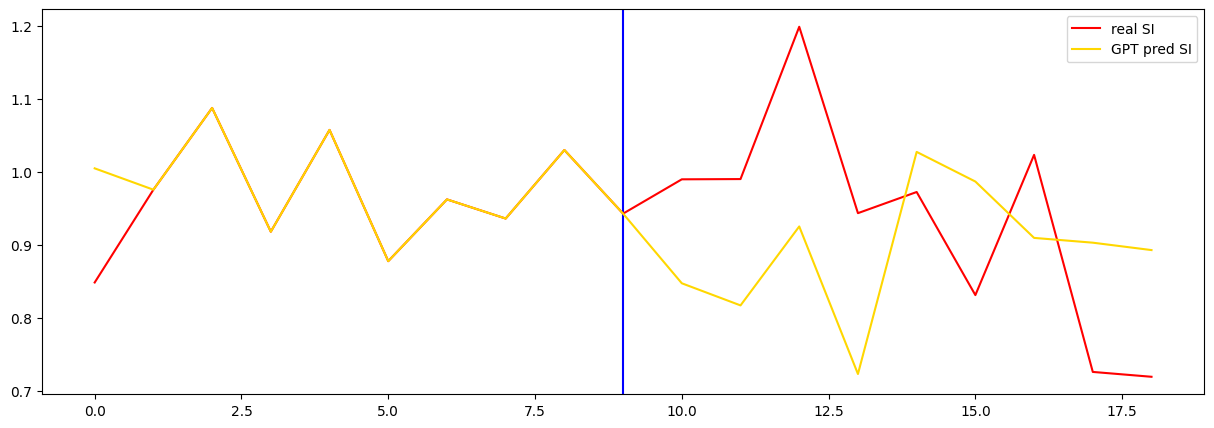

In [39]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk300to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  7.7956037521362305
seq length of pred =  10
[1.41681784 1.83156239 4.94688981 9.30809417 1.05438113 0.55984544]
loss_SI... [tensor(2.1088, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.3368, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(7.7956, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(7.7956, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.102224588394165
seq length of pred =  10
[0.88367651 1.29485737 3.77547099 5.91703298 0.704962   0.3708642 ]
loss_SI... [tensor(1.4099, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.9751, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.1022, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.1022, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.6093599200248718
seq length of pred =  10
[0.66913663 1.0836353  3.39107946 5.15326684 0.68160075 0.34

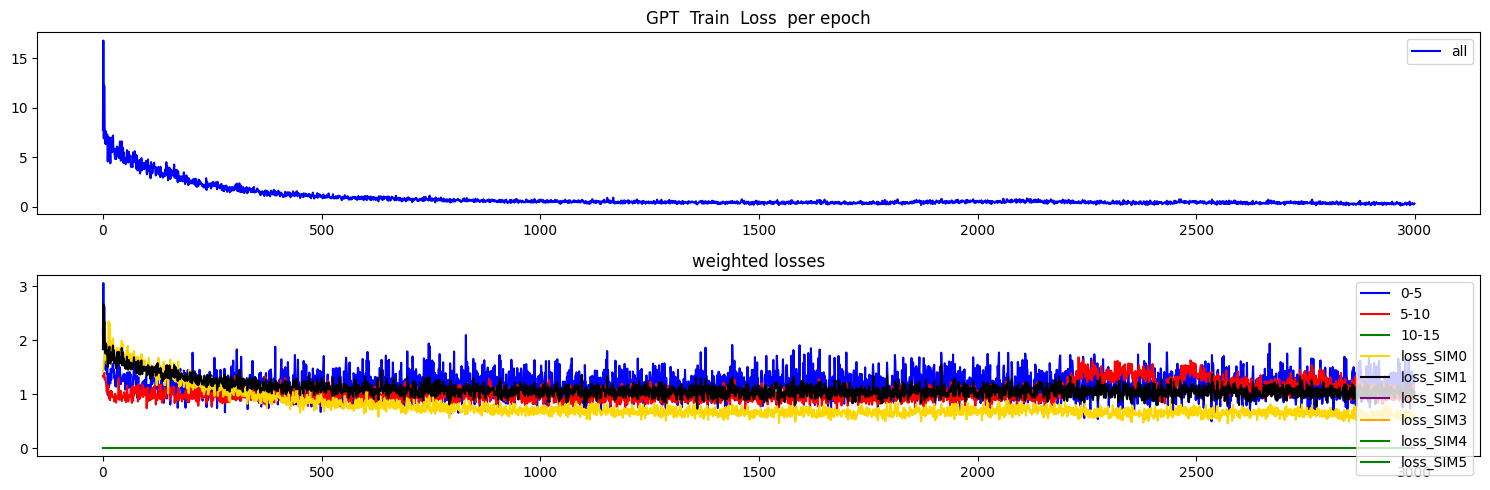

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.043014831840991974
Test MSE Loss - SI only 0-5:  0.0463593527674675
Test MSE Loss - SI only 5-10:  0.029686719179153442
Test MSE Loss - SI only 10-15:  0.036134328693151474
mae, mse, rmse, mape, mspe, rse, corr
(0.18947932, 0.04301483, 0.20740017, 14.0204115, 2581.2808, 1.4448243)
Testing R**2 - SI only:  -1.0875172151148083
Testing R**2 - SI only:  -1.0875172151148083
Testing R**2 - All features:  0.9944293760432055
Testing R**2 - (f2) - SI full:  -1.0591602450592643


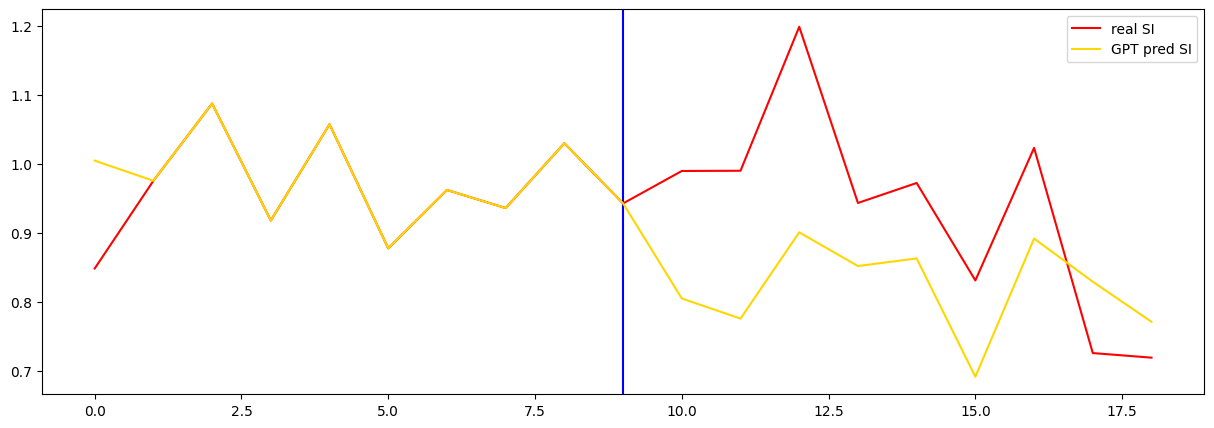

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk200to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9  )


0 train loss =  8.131975173950195
seq length of pred =  10
[1.72985337 2.08661826 4.93555667 8.92402145 0.88427    0.51063035]
loss_SI... [tensor(1.7685, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.3280, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(8.1320, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(8.1320, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  1.822439193725586
seq length of pred =  10
[0.93627492 1.19260557 3.28214004 6.11295789 0.78001833 0.41923098]
loss_SI... [tensor(1.5600, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.9434, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(1.8224, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(1.8224, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  0.9291324615478516
seq length of pred =  10
[0.68551895 1.00047188 2.63580291 4.277787   0.47883068 0.287

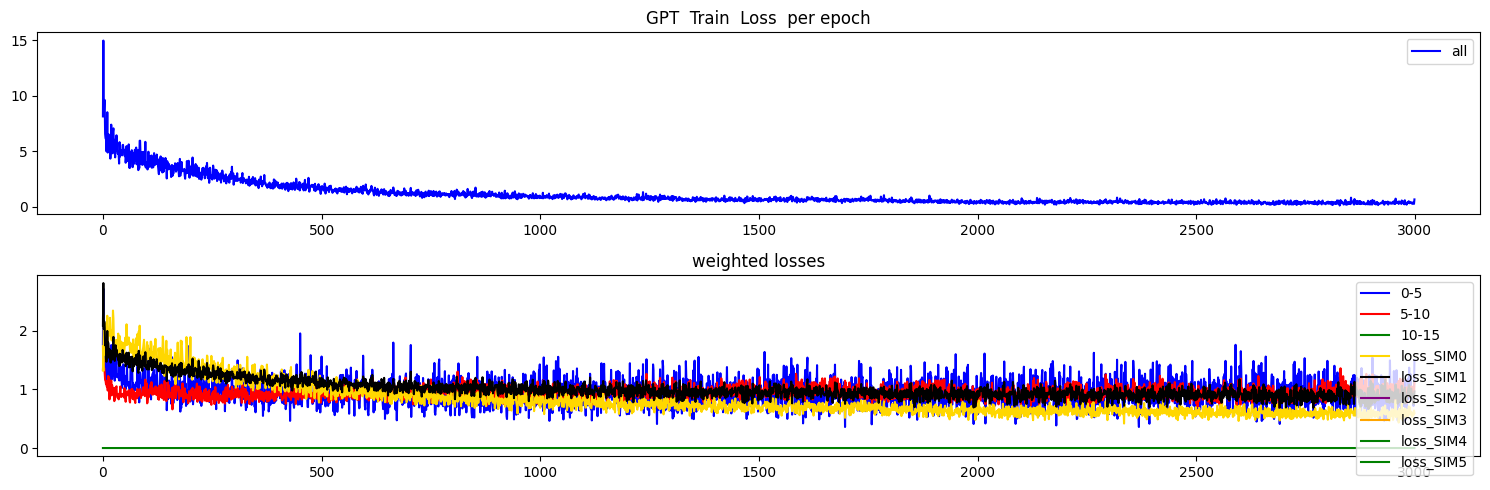

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.0518159382045269
Test MSE Loss - SI only 0-5:  0.0463593527674675
Test MSE Loss - SI only 5-10:  0.051979731768369675
Test MSE Loss - SI only 10-15:  0.047285519540309906
mae, mse, rmse, mape, mspe, rse, corr
(0.20175916, 0.05181594, 0.22763115, 23.831627, 7868.2524, 1.5857606)
Testing R**2 - SI only:  -1.5146363983322368
Testing R**2 - SI only:  -1.5146363983322368
Testing R**2 - All features:  0.9930364013401703
Testing R**2 - (f2) - SI full:  -4.424028636995945


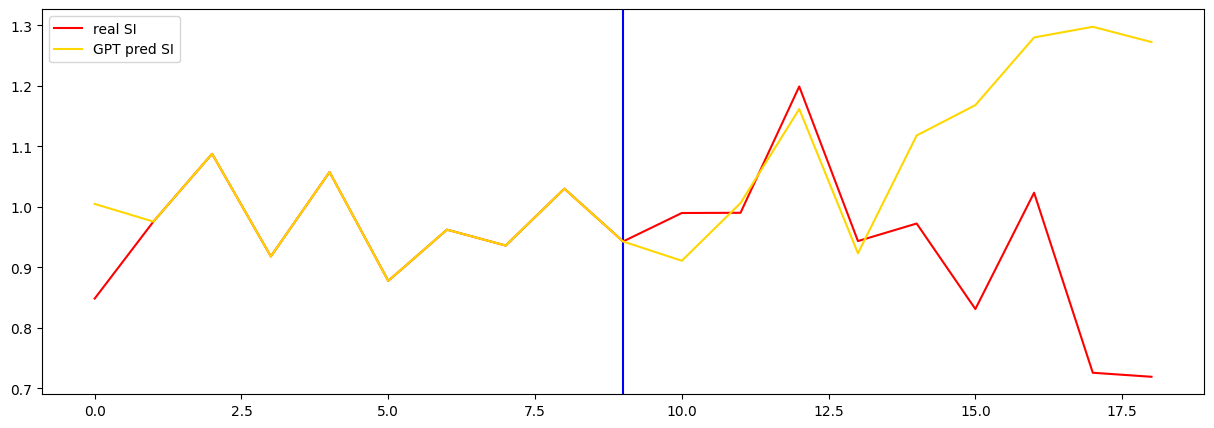

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk100to400_train  )
results_string = inferenceGPT_obj.function_test_rc(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )


0 train loss =  5.218289375305176
seq length of pred =  10
[1.60620728 1.58548585 3.84060418 7.70941503 0.59046618 0.43988943]
loss_SI... [tensor(1.1809, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(1.1114, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(5.2183, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(5.2183, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
500 train loss =  2.120255947113037
seq length of pred =  10
[1.52999145 1.21095177 2.90450479 5.32353566 0.39278144 0.29735844]
loss_SI... [tensor(0.7856, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_all.. [tensor(0.7981, device='cuda:0', grad_fn=<MseLossBackward0>)]
loss_DTW.. tensor(2.1203, device='cuda:0', grad_fn=<MeanBackward0>)
loss_total.. tensor(2.1203, device='cuda:0', grad_fn=<MeanBackward0>)
*************************
1000 train loss =  1.0954504013061523
seq length of pred =  10
[0.96153375 1.16783694 2.99992708 5.06385213 0.54462529 0.314

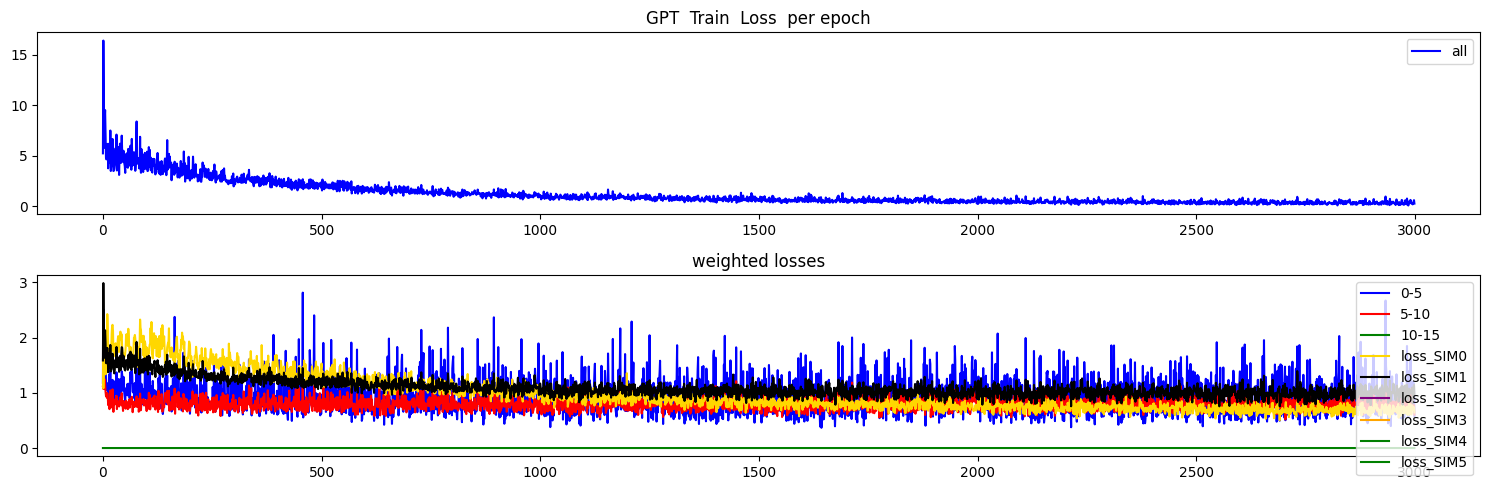

max tokens  9
torch.Size([1, 10, 35])
(19,)
(19,)
Test MSE Loss - SI only:  0.0424712710082531
Test MSE Loss - SI only 0-5:  0.0463593527674675
Test MSE Loss - SI only 5-10:  0.023636899888515472
Test MSE Loss - SI only 10-15:  0.04011860117316246
mae, mse, rmse, mape, mspe, rse, corr
(0.1797706, 0.042471267, 0.20608558, 3.0210037, 19.283718, 1.4356664)
Testing R**2 - SI only:  -1.0611379415976043
Testing R**2 - SI only:  -1.0611379415976043
Testing R**2 - All features:  0.9777658330784772
Testing R**2 - (f2) - SI full:  -3.02995471253001


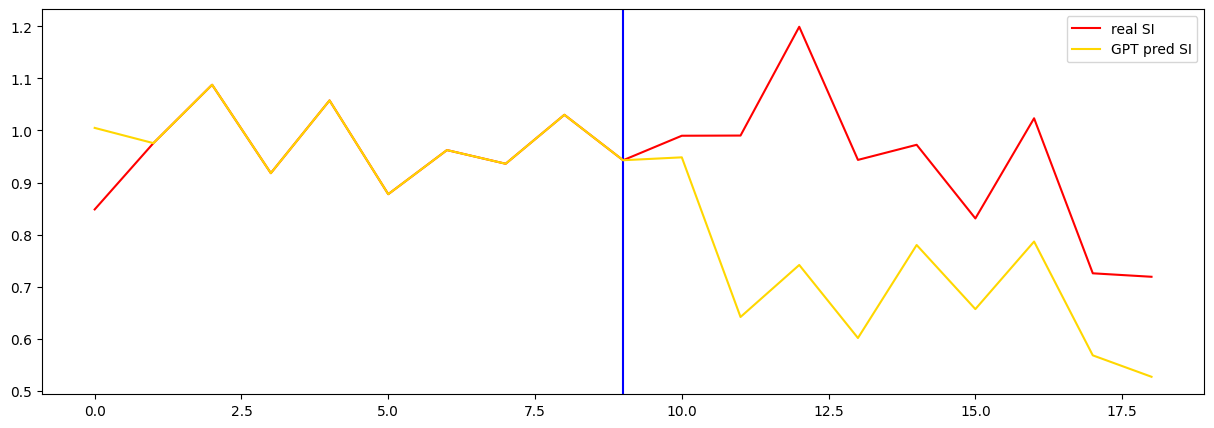

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  chunk000to400_train )
results_string = inferenceGPT_obj.function_test_rc(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, True, 9 )



## Train on Train, Test on Train



## 000 to 015


In [ ]:

inferenceGPT_obj.the_offset = 0
train_CIVS, test_CIVS                                    = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  train_CIVS  ) 
results_string  = inferenceGPT_obj.function_test_rc( train_CIVS, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 015 to 030


In [ ]:

inferenceGPT_obj.the_offset = 15
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 030 to 045


In [ ]:

inferenceGPT_obj.the_offset = 30
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )  ## 99



## 045 to 060


In [ ]:

inferenceGPT_obj.the_offset = 45
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 060 to 075


In [ ]:

inferenceGPT_obj.the_offset = 60
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 075 to 090


In [ ]:

inferenceGPT_obj.the_offset = 75
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## 090 to 105


In [ ]:

inferenceGPT_obj.the_offset = 90
chunk_slideWind_train, test_CIVS                         = tsGPT_obj.slidingWindowTrain( inferenceGPT_obj.the_offset  )
si_GPT, history_GPT, x_means, x_standard_devs, data_zh   = function_train_rc(  chunk_slideWind_train  ) 
results_string = inferenceGPT_obj.function_test_rc( chunk_slideWind_train, test_CIVS, si_GPT, x_means, x_standard_devs, False, 29 )



## Save excel to csv


In [ ]:
 
## inferenceGPT_obj.save_Excel_to_CSV()



## Add the dates ( ??) 


In [ ]:

## tsDataWrangling_obj.add_dates_after_GPT_is_trained( tsGPT_obj )
